# PCA for 6 and 10 components

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [193]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_2_instances_pose_only.csv')

In [194]:
df_or = df_10_10inst.set_index(["videoname", "n_frame", "n_landmark"])[["x", "y"]].stack().reset_index()
df_or
df_or.rename(columns={"level_3": "axis", 0: "coordinate"}, inplace=True)

In [195]:
df_10_10inst = df_or


In [196]:
'''

df_or.rename(columns={"level_3": "axis", 0: "coordinate"}, inplace=True)

list_dfs = [df_or[FINAL_COLUMNS]]
df_or = pd.concat(list_dfs).sort_values(by=FINAL_COLUMNS[:-1], ascending=True)

df_or.head()
'''
'''
assert len(df_or) % (2 * 10 * len(LIST_LANDMARKS)) == 0, "This shape is not correct"
data_array = df_or['coordinate'].values.reshape((-1, 2, 10, len(LIST_LANDMARKS)))
df_or.to_csv("prueba.csv", header = True, index = False)
'''

'\nassert len(df_or) % (2 * 10 * len(LIST_LANDMARKS)) == 0, "This shape is not correct"\ndata_array = df_or[\'coordinate\'].values.reshape((-1, 2, 10, len(LIST_LANDMARKS)))\ndf_or.to_csv("prueba.csv", header = True, index = False)\n'

In [197]:
'''
classes_pose_only = pd.unique(df_10_10inst['class'])
type(classes_pose_only)
classes_pose_only = classes_pose_only.tolist()
'''

"\nclasses_pose_only = pd.unique(df_10_10inst['class'])\ntype(classes_pose_only)\nclasses_pose_only = classes_pose_only.tolist()\n"

In [198]:
'''
df_10_10inst_2 = pd.read_csv('C:/PSL_KNN/data_10_frames_2_instances_fingers.csv')
df_10_10inst_2
'''

"\ndf_10_10inst_2 = pd.read_csv('C:/PSL_KNN/data_10_frames_2_instances_fingers.csv')\ndf_10_10inst_2\n"

In [199]:
'''
classes_fingers= pd.unique(df_10_10inst_2['class'])
classes_fingers = classes_fingers.tolist()
'''

"\nclasses_fingers= pd.unique(df_10_10inst_2['class'])\nclasses_fingers = classes_fingers.tolist()\n"

In [200]:
'''
type(classes_fingers)
'''

'\ntype(classes_fingers)\n'

In [201]:
#INTERSECTION CLASSES
'''
intersection = np.intersect1d(classes_fingers,classes_pose_only)
intersection
'''

'\nintersection = np.intersect1d(classes_fingers,classes_pose_only)\nintersection\n'

In [202]:
intersection = ['abuelo',
       'aceptar', 'adentro', 'agrupar', 'agua', 'ahora', 'ahí', 'alegría',
       'amarrar', 'ambiente', 'amigo', 'animales', 'antes', 'aprender',
       'aproximadamente', 'aquí', 'beneficio', 'bien', 'botar', 'brotar',
       'buen', 'cada uno', 'cambiar', 'carne', 'casa', 'colores', 'comer',
       'conocer', 'contento', 'continuar', 'controlar', 'crecer',
       'cuaderno', 'cuerpo', 'cuánto', 'cuántos', 'cómo', 'decir',
       'dejar', 'dentro', 'diariamente', 'dibujar', 'diferente',
       'diferentes', 'dos', 'día', 'edad', 'ejercicios', 'ella', 'ellos',
       'emoción', 'empezar', 'enojar', 'entender', 'entonces', 'escribir',
       'ese', 'familia', 'feliz', 'fortalecer', 'frijol', 'fuerte',
       'fácil', 'grasa', 'guardar', 'gustar', 'habitación', 'hacer',
       'hermano', 'hola', 'hoy', 'idea', 'importante', 'interesante',
       'ira', 'jugar', 'juntos', 'llamar', 'mal', 'ministerio',
       'más o menos', 'necesitar', 'niños', 'no', 'nombre', 'nosotros',
       'o', 'objetivo', 'paciencia', 'papá', 'pensar', 'pero', 'planta',
       'poder', 'porcentaje', 'porción', 'preguntar', 'preguntas',
       'primaria', 'primo', 'probar', 'proceso', 'profesor', 'proteína',
       'proteínas', 'que', 'quinto', 'qué', 'razón', 'recordar',
       'relación', 'salud', 'saludable', 'seco', 'seguro', 'seleccionar',
       'semana', 'sentir', 'ser', 'sexto', 'solo', 'sí', 'también',
       'tener', 'tiempo', 'todo', 'tú', 'uno', 'usar', 'ustedes', 'vaca',
       'valor', 'venir', 'ver', 'ya', 'yo', 'él']

In [203]:
len(intersection)

137

In [204]:
df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
df_10_10inst

,videoname,n_frame,n_landmark,axis,coordinate,classes
0,A-L-E-X_271,0,0,x,0.464181,A-L-E-X
1,A-L-E-X_271,0,0,y,0.202892,A-L-E-X
2,A-L-E-X_271,0,1,x,0.487545,A-L-E-X
3,A-L-E-X_271,0,1,y,0.165676,A-L-E-X
4,A-L-E-X_271,0,2,x,0.502058,A-L-E-X
...,...,...,...,...,...,...
350975,él_524,12,20,y,0.403665,él
350976,él_524,12,21,x,0.535946,él
350977,él_524,12,21,y,0.781035,él
350978,él_524,12,22,x,0.201839,él


In [205]:
#SAVE IT
correct_classes = df_10_10inst[df_10_10inst["classes"].isin(intersection) ]

In [206]:
df_10_10inst = correct_classes

In [207]:
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

['abuelo_255' 'abuelo_258' 'abuelo_262' 'abuelo_266' 'abuelo_30'
 'aceptar_185' 'aceptar_66' 'ahora_243' 'ahora_246' 'ahora_64' 'ahora_74'
 'ahí_101' 'ahí_151' 'ahí_231' 'alegría_254' 'alegría_284' 'alegría_289'
 'ambiente_203' 'ambiente_229' 'amigo_105' 'amigo_171' 'antes_114'
 'antes_248' 'antes_283' 'antes_41' 'aprender_175' 'aprender_195'
 'aprender_217' 'aprender_282' 'aprender_35' 'aprender_7' 'aquí_19'
 'bien_17' 'bien_174' 'bien_230' 'bien_241' 'bien_244' 'bien_278'
 'bien_295' 'bien_39' 'bien_95' 'cambiar_50' 'casa_256' 'casa_9'
 'controlar_144' 'controlar_176' 'controlar_178' 'controlar_192'
 'crecer_136' 'cuerpo_51' 'cuerpo_67' 'cómo_223' 'cómo_44' 'cómo_85'
 'cómo_90' 'decir_138' 'decir_265' 'dejar_129' 'dejar_131' 'dentro_55'
 'dibujar_211' 'dos_280' 'día_261' 'edad_60' 'emoción_143' 'emoción_145'
 'emoción_188' 'emoción_249' 'emoción_250' 'emoción_272' 'emoción_281'
 'emoción_286' 'emoción_43' 'emoción_45' 'emoción_54' 'emoción_71'
 'emoción_81' 'emoción_93' 'empezar_219'

In [208]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
0,0.536879,0.189710,0.560019,0.156761,0.574746,0.158068,0.588373,0.158515,0.514476,0.153241,...,0.397964,0.741280,0.430257,0.378446,0.409944,0.695142,0.446491,0.387260,0.397618,0.683276
1,0.450507,0.181265,0.477267,0.148909,0.494116,0.148186,0.505951,0.147870,0.430992,0.151556,...,0.457962,0.661473,0.490809,0.366553,0.471765,0.636251,0.503767,0.378047,0.460948,0.625526
2,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,0.150295,...,0.452036,0.648156,0.568738,0.371538,0.459190,0.612238,0.573389,0.384219,0.444707,0.602863
3,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,0.184704,...,0.464489,0.692755,0.495891,0.342286,0.485414,0.662636,0.507392,0.362826,0.467912,0.648935
4,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,0.182878,...,0.417192,0.686837,0.497179,0.390089,0.424702,0.655083,0.514916,0.398775,0.416921,0.645249


In [209]:
temp_10_10inst

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
0,0.536879,0.189710,0.560019,0.156761,0.574746,0.158068,0.588373,0.158515,0.514476,0.153241,...,0.397964,0.741280,0.430257,0.378446,0.409944,0.695142,0.446491,0.387260,0.397618,0.683276
1,0.450507,0.181265,0.477267,0.148909,0.494116,0.148186,0.505951,0.147870,0.430992,0.151556,...,0.457962,0.661473,0.490809,0.366553,0.471765,0.636251,0.503767,0.378047,0.460948,0.625526
2,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,0.150295,...,0.452036,0.648156,0.568738,0.371538,0.459190,0.612238,0.573389,0.384219,0.444707,0.602863
3,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,0.184704,...,0.464489,0.692755,0.495891,0.342286,0.485414,0.662636,0.507392,0.362826,0.467912,0.648935
4,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,0.182878,...,0.417192,0.686837,0.497179,0.390089,0.424702,0.655083,0.514916,0.398775,0.416921,0.645249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.500710,0.231754,0.526540,0.196818,0.543197,0.198539,0.556609,0.200109,0.472630,0.196468,...,0.152237,0.467590,0.519669,0.837087,0.152150,0.440428,0.540678,0.820307,0.167476,0.461492
708,0.492722,0.235080,0.525487,0.199688,0.542215,0.202814,0.555085,0.206893,0.469453,0.195648,...,0.161203,0.432645,0.495588,0.812524,0.163681,0.401690,0.518535,0.795971,0.181650,0.433360
709,0.501005,0.219862,0.524343,0.186649,0.540871,0.188685,0.553684,0.190579,0.472407,0.186477,...,0.144039,0.444509,0.528446,0.824007,0.144217,0.411932,0.548421,0.806284,0.158420,0.440283
710,0.494708,0.273958,0.525151,0.228831,0.538248,0.229622,0.554530,0.230451,0.472727,0.228562,...,0.325748,0.447011,0.485569,0.818265,0.328480,0.423099,0.510522,0.802333,0.344352,0.450350


In [210]:
temp_10_10inst.insert(0,"instance",['abuelo_255','abuelo_258','abuelo_262','abuelo_266','abuelo_30'
,'aceptar_185','aceptar_66','ahora_243','ahora_246','ahora_64','ahora_74'
,'ahí_101','ahí_151','ahí_231','alegría_254','alegría_284','alegría_289'
,'ambiente_203','ambiente_229','amigo_105','amigo_171','antes_114'
,'antes_248','antes_283','antes_41','aprender_175','aprender_195'
,'aprender_217','aprender_282','aprender_35','aprender_7','aquí_19'
,'bien_17','bien_174','bien_230','bien_241','bien_244','bien_278'
,'bien_295','bien_39','bien_95','cambiar_50','casa_256','casa_9'
,'controlar_144','controlar_176','controlar_178','controlar_192'
,'crecer_136','cuerpo_51','cuerpo_67','cómo_223','cómo_44','cómo_85'
,'cómo_90','decir_138','decir_265','dejar_129','dejar_131','dentro_55'
,'dibujar_211','dos_280','día_261','edad_60','emoción_143','emoción_145'
,'emoción_188','emoción_249','emoción_250','emoción_272','emoción_281'
,'emoción_286','emoción_43','emoción_45','emoción_54','emoción_71'
,'emoción_81','emoción_93','empezar_219','enojar_102','enojar_107'
,'enojar_124','enojar_276','enojar_99','entender_137','entender_141'
,'familia_204','feliz_274','habitación_267','habitación_270','hacer_191'
,'hermano_100','hermano_116','hermano_150','hermano_169','hola_0'
,'hoy_218','hoy_221','idea_10','ira_285','ira_290','jugar_115','jugar_130'
,'jugar_98','juntos_36','ministerio_11','más o menos_61','necesitar_147'
,'nombre_73','nosotros_181','nosotros_183','nosotros_65','no_108','no_111'
,'objetivo_208','objetivo_220','paciencia_153','paciencia_158','papá_263'
,'papá_27','pensar_189','pensar_97','poder_77','poder_84','preguntar_75'
,'primaria_22','primo_104','profesor_252','que_148','que_190','quinto_23'
,'razón_146','recordar_206','recordar_247','recordar_62','relación_161'
,'relación_163','seguro_18','seguro_21','seleccionar_222','seleccionar_68'
,'semana_180','semana_40','sentir_16','sentir_187','sentir_38','sentir_53'
,'sentir_89','sexto_24','sí_155','sí_157','sí_159','sí_194','sí_200'
,'sí_228','sí_240','sí_242','sí_251','sí_253','sí_277','sí_37','sí_76'
,'sí_79','sí_83','también_201','tener_184','tiempo_49','tiempo_91'
,'tú_172','tú_205','tú_207','tú_288','tú_63','tú_96','uno_260','usar_214'
,'ustedes_239','venir_26','venir_29','venir_31','yo_113','yo_119','yo_121'
,'yo_123','yo_125','yo_140','yo_152','yo_164','yo_193','yo_235','yo_237'
,'yo_3','adentro_150','adentro_677','agrupar_103','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_186','agua_190'
,'agua_202','agua_399','agua_537','agua_95','ahora_463','ahora_690'
,'ahora_739','ahora_793','ahora_801','amarrar_181','amarrar_204'
,'animales_652','animales_675','animales_702','antes_82','antes_89'
,'antes_92','aprender_18','aprender_27','aprender_34','aprender__466'
,'aproximadamente_193','aproximadamente_745','aquí_189','aquí_330'
,'aquí_631','beneficio_384','beneficio_411','bien_147','bien_16'
,'bien_269','bien_288','bien_294','bien_329','bien_337','bien_381'
,'bien_383','bien_401','bien_416','bien_561','bien_626','botar_201'
,'botar_205','brotar_117','brotar_136','buen_0','buen_151','cada uno_563'
,'cada uno_714','cada uno_748','cambiar_108','cambiar_140','carne_111'
,'carne_218','carne_326','carne_423','carne_683','carne_687','carne_698'
,'carne_98','casa_156','casa_19','casa_29','colores_798','colores_813'
,'comer_123','comer_144','comer_146','comer_148','comer_164','comer_231'
,'comer_238','comer_248','comer_286','comer_293','comer_303','comer_309'
,'comer_312','comer_313','comer_323','comer_335','comer_355','comer_382'
,'comer_408','comer_412','comer_414','comer_422','comer_426','comer_437'
,'comer_444','comer_452','comer_470','comer_475','comer_477','comer_484'
,'comer_489','comer_529','comer_560','comer_590','comer_625','comer_644'
,'comer_654','comer_70','comer_705','comer_709','comer_712','comer_743'
,'comer_747','comer_765','comer_779','comer_783','comer_86','conocer_245'
,'conocer_79','conocer_83','contento_516','contento_74','continuar_106'
,'continuar_26','continuar_356','continuar_88','crecer_120','crecer_576'
,'cuaderno_55','cuaderno_810','cuerpo_446','cuerpo_476','cuerpo_597'
,'cuerpo_599','cuerpo_605','cuántos_443','cuántos_620','cuánto_405'
,'cuánto_420','cuánto_445','cuánto_448','cuánto_456','cuánto_460'
,'cuánto_468','cuánto_483','cuánto_703','cuánto_706','cuánto_708'
,'cuánto_733','cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_230'
,'cómo_379','cómo_387','cómo_427','cómo_9','decir_101','decir_224'
,'decir_276','decir_321','decir_433','decir_528','decir_755','decir_789'
,'dentro_241','dentro_369','dentro_371','dentro_457','dentro_486'
,'dentro_532','dentro_566','dentro_580','dentro_596','dentro_603'
,'dentro_627','dentro_647','dentro_664','dentro_692','dentro_73'
,'diariamente_402','diariamente_479','diariamente_785','dibujar_261'
,'diferentes_471','diferentes_569','diferentes_668','diferentes_681'
,'diferentes_689','diferentes_701','diferentes_750','diferentes_84'
,'diferente_454','diferente_71','dos_669','dos_682','día_1','día_197'
,'edad_718','ejercicios_726','ejercicios_728','ella_504','ella_527'
,'ella_616','ellos_559','ellos_746','ellos_754','ellos_767','ellos_772'
,'empezar_32','entonces_364','entonces_480','escribir_56','escribir_60'
,'escribir_62','escribir_797','escribir_807','ese_100','ese_121','ese_138'
,'ese_143','ese_214','ese_380','ese_385','ese_544','ese_608','ese_638'
,'ese_642','ese_697','ese_719','familia_165','familia_45','familia_75'
,'feliz_15','fortalecer_548','fortalecer_582','frijol_132','frijol_175'
,'frijol_216','frijol_434','fuerte_152','fuerte_153','fuerte_240'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_487','fuerte_571','fuerte_584'
,'fuerte_588','fuerte_628','fácil_255','fácil_318','fácil_319','fácil_341'
,'grasa_368','grasa_396','grasa_534','grasa_553','grasa_557','guardar_105'
,'guardar_87','guardar_93','guardar_97','gustar_439','gustar_453'
,'hacer_158','hacer_161','hacer_172','hacer_725','hacer_81','hermano_39'
,'hermano_40','hola_508','hola_509','hola_513','hola_632','hoy_127'
,'hoy_521','hoy_540','idea_21','importante_545','importante_629'
,'importante_636','interesante_113','interesante_610','juntos_517'
,'juntos_519','juntos_618','juntos_621','llamar_46','llamar_614','mal_250'
,'mal_273','mal_287','mal_299','mal_301','mal_334','mal_336'
,'ministerio_23','más o menos_752','más o menos_763','más o menos_766'
,'más o menos_780','necesitar_474','necesitar_713','necesitar_734'
,'niños_2','niños_510','niños_736','niños_749','niños_756','niños_770'
,'niños_776','nombre_7','no_166','no_289','no_297','no_333','no_386'
,'no_462','no_667','o_195','o_272','o_722','pensar_213','pensar_235'
,'pensar_339','pensar_378','pensar_406','pensar_450','pensar_461'
,'pensar_600','pensar_61','pensar_613','pensar_623','pensar_640'
,'pensar_641','pensar_66','pensar_753','pensar_761','pensar_771'
,'pensar_777','pero_376','pero_442','pero_496','pero_611','pero_660'
,'planta_119','planta_133','planta_142','planta_159','planta_173'
,'planta_215','planta_217','planta_435','poder_162','poder_645'
,'porcentaje_491','porcentaje_495','porcentaje_507','porción_421'
,'porción_425','preguntar_732','preguntas_236','preguntas_59','primaria_5'
,'primaria_760','primaria_775','primo_38','probar_254','probar_317'
,'probar_67','proceso_170','proceso_351','profesor_501','profesor_817'
,'proteínas_370','proteínas_572','proteínas_648','proteínas_656'
,'proteínas_676','proteínas_694','proteínas_784','proteína_393'
,'proteína_531','proteína_704','quinto_3','quinto_737','quinto_758'
,'quinto_773','qué_212','qué_274','qué_304','qué_417','qué_573','qué_727'
,'qué_731','qué__131','razón_658','recordar_169','saludable_227'
,'saludable__233','salud_239','salud_271','salud_345','seco_222'
,'seco_699','semana_64','sentir_14','sentir_149','sentir_458','sentir_547'
,'sentir_570','sentir_591','sentir_602','sentir_604','ser_226','ser_342'
,'sexto_4','sexto_738','sexto_759','sexto_774','solo_661','solo_663'
,'sí_278','sí_281','sí_284','sí_291','sí_306','sí_315','sí_359','sí_419'
,'sí_565','sí_633','sí_657','sí_659','sí__228','también_114','también_124'
,'también_182','también_552','también_595','también_598','también_799'
,'tener_530','todo_320','todo_327','todo_511','todo_58','todo_606'
,'tú_154','tú_168','tú_176','tú_229','tú_243','tú_247','tú_263','tú_277'
,'tú_390','tú_407','tú_53','tú_619','tú_635','tú_639','tú_691','tú_711'
,'tú_740','tú_762','tú_778','tú_791','tú_80','tú_803','uno_666','uno_674'
,'usar_90','ustedes_520','vaca_653','vaca_662','vaca_688','vaca_700'
,'valor_469','valor_485','valor_764','venir_54','venir_617','venir_806'
,'venir_818','ver_128','ver_264','ver_279','ver_49','ver_494','ver_622'
,'ya_115','ya_125','ya_30','ya_35','ya_350','ya_78','yo_630','él_260'
,'él_280','él_285','él_290','él_295','él_302','él_311','él_500','él_524'
],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst.head()

,instance,0,1,2,3,4,5,6,7,8,...,451,452,453,454,455,456,457,458,459,classes
0,abuelo_255,0.536879,0.189710,0.560019,0.156761,0.574746,0.158068,0.588373,0.158515,0.514476,...,0.741280,0.430257,0.378446,0.409944,0.695142,0.446491,0.387260,0.397618,0.683276,abuelo
1,abuelo_258,0.450507,0.181265,0.477267,0.148909,0.494116,0.148186,0.505951,0.147870,0.430992,...,0.661473,0.490809,0.366553,0.471765,0.636251,0.503767,0.378047,0.460948,0.625526,abuelo
2,abuelo_262,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,...,0.648156,0.568738,0.371538,0.459190,0.612238,0.573389,0.384219,0.444707,0.602863,abuelo
3,abuelo_266,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,...,0.692755,0.495891,0.342286,0.485414,0.662636,0.507392,0.362826,0.467912,0.648935,abuelo
4,abuelo_30,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,...,0.686837,0.497179,0.390089,0.424702,0.655083,0.514916,0.398775,0.416921,0.645249,abuelo


In [211]:
alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:462]  #461 columnas
new_alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:461]  #460 columnas
new_alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
0,0.536879,0.189710,0.560019,0.156761,0.574746,0.158068,0.588373,0.158515,0.514476,0.153241,...,0.397964,0.741280,0.430257,0.378446,0.409944,0.695142,0.446491,0.387260,0.397618,0.683276
1,0.450507,0.181265,0.477267,0.148909,0.494116,0.148186,0.505951,0.147870,0.430992,0.151556,...,0.457962,0.661473,0.490809,0.366553,0.471765,0.636251,0.503767,0.378047,0.460948,0.625526
2,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,0.150295,...,0.452036,0.648156,0.568738,0.371538,0.459190,0.612238,0.573389,0.384219,0.444707,0.602863
3,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,0.184704,...,0.464489,0.692755,0.495891,0.342286,0.485414,0.662636,0.507392,0.362826,0.467912,0.648935
4,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,0.182878,...,0.417192,0.686837,0.497179,0.390089,0.424702,0.655083,0.514916,0.398775,0.416921,0.645249


In [212]:
alldataset_dataset_10_10inst = alldataset_dataset_10_10inst.T.iloc[:460,:]
alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,702,703,704,705,706,707,708,709,710,711
0,0.536879,0.450507,0.451338,0.504347,0.528134,0.472934,0.48278,0.479825,0.494024,0.500677,...,0.508835,0.505215,0.525901,0.510456,0.518331,0.50071,0.492722,0.501005,0.494708,0.508496
1,0.18971,0.181265,0.187149,0.227849,0.21704,0.213904,0.18406,0.257582,0.23812,0.240871,...,0.252666,0.268988,0.241067,0.225049,0.225786,0.231754,0.23508,0.219862,0.273958,0.247964
2,0.560019,0.477267,0.472543,0.515761,0.555099,0.503864,0.494463,0.504335,0.519081,0.529579,...,0.536478,0.533698,0.550579,0.533686,0.540626,0.52654,0.525487,0.524343,0.525151,0.536937
3,0.156761,0.148909,0.152198,0.187243,0.187347,0.172804,0.152365,0.216974,0.201082,0.201375,...,0.210624,0.227704,0.207127,0.191259,0.190485,0.196818,0.199688,0.186649,0.228831,0.203433
4,0.574746,0.494116,0.487261,0.526263,0.57295,0.521181,0.503126,0.523595,0.534593,0.545469,...,0.555312,0.551248,0.568304,0.54895,0.555228,0.543197,0.542215,0.540871,0.538248,0.555539


In [213]:
alldataset_dataset_10_10inst.columns = [['abuelo_255','abuelo_258','abuelo_262','abuelo_266','abuelo_30'
,'aceptar_185','aceptar_66','ahora_243','ahora_246','ahora_64','ahora_74'
,'ahí_101','ahí_151','ahí_231','alegría_254','alegría_284','alegría_289'
,'ambiente_203','ambiente_229','amigo_105','amigo_171','antes_114'
,'antes_248','antes_283','antes_41','aprender_175','aprender_195'
,'aprender_217','aprender_282','aprender_35','aprender_7','aquí_19'
,'bien_17','bien_174','bien_230','bien_241','bien_244','bien_278'
,'bien_295','bien_39','bien_95','cambiar_50','casa_256','casa_9'
,'controlar_144','controlar_176','controlar_178','controlar_192'
,'crecer_136','cuerpo_51','cuerpo_67','cómo_223','cómo_44','cómo_85'
,'cómo_90','decir_138','decir_265','dejar_129','dejar_131','dentro_55'
,'dibujar_211','dos_280','día_261','edad_60','emoción_143','emoción_145'
,'emoción_188','emoción_249','emoción_250','emoción_272','emoción_281'
,'emoción_286','emoción_43','emoción_45','emoción_54','emoción_71'
,'emoción_81','emoción_93','empezar_219','enojar_102','enojar_107'
,'enojar_124','enojar_276','enojar_99','entender_137','entender_141'
,'familia_204','feliz_274','habitación_267','habitación_270','hacer_191'
,'hermano_100','hermano_116','hermano_150','hermano_169','hola_0'
,'hoy_218','hoy_221','idea_10','ira_285','ira_290','jugar_115','jugar_130'
,'jugar_98','juntos_36','ministerio_11','más o menos_61','necesitar_147'
,'nombre_73','nosotros_181','nosotros_183','nosotros_65','no_108','no_111'
,'objetivo_208','objetivo_220','paciencia_153','paciencia_158','papá_263'
,'papá_27','pensar_189','pensar_97','poder_77','poder_84','preguntar_75'
,'primaria_22','primo_104','profesor_252','que_148','que_190','quinto_23'
,'razón_146','recordar_206','recordar_247','recordar_62','relación_161'
,'relación_163','seguro_18','seguro_21','seleccionar_222','seleccionar_68'
,'semana_180','semana_40','sentir_16','sentir_187','sentir_38','sentir_53'
,'sentir_89','sexto_24','sí_155','sí_157','sí_159','sí_194','sí_200'
,'sí_228','sí_240','sí_242','sí_251','sí_253','sí_277','sí_37','sí_76'
,'sí_79','sí_83','también_201','tener_184','tiempo_49','tiempo_91'
,'tú_172','tú_205','tú_207','tú_288','tú_63','tú_96','uno_260','usar_214'
,'ustedes_239','venir_26','venir_29','venir_31','yo_113','yo_119','yo_121'
,'yo_123','yo_125','yo_140','yo_152','yo_164','yo_193','yo_235','yo_237'
,'yo_3','adentro_150','adentro_677','agrupar_103','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_186','agua_190'
,'agua_202','agua_399','agua_537','agua_95','ahora_463','ahora_690'
,'ahora_739','ahora_793','ahora_801','amarrar_181','amarrar_204'
,'animales_652','animales_675','animales_702','antes_82','antes_89'
,'antes_92','aprender_18','aprender_27','aprender_34','aprender__466'
,'aproximadamente_193','aproximadamente_745','aquí_189','aquí_330'
,'aquí_631','beneficio_384','beneficio_411','bien_147','bien_16'
,'bien_269','bien_288','bien_294','bien_329','bien_337','bien_381'
,'bien_383','bien_401','bien_416','bien_561','bien_626','botar_201'
,'botar_205','brotar_117','brotar_136','buen_0','buen_151','cada uno_563'
,'cada uno_714','cada uno_748','cambiar_108','cambiar_140','carne_111'
,'carne_218','carne_326','carne_423','carne_683','carne_687','carne_698'
,'carne_98','casa_156','casa_19','casa_29','colores_798','colores_813'
,'comer_123','comer_144','comer_146','comer_148','comer_164','comer_231'
,'comer_238','comer_248','comer_286','comer_293','comer_303','comer_309'
,'comer_312','comer_313','comer_323','comer_335','comer_355','comer_382'
,'comer_408','comer_412','comer_414','comer_422','comer_426','comer_437'
,'comer_444','comer_452','comer_470','comer_475','comer_477','comer_484'
,'comer_489','comer_529','comer_560','comer_590','comer_625','comer_644'
,'comer_654','comer_70','comer_705','comer_709','comer_712','comer_743'
,'comer_747','comer_765','comer_779','comer_783','comer_86','conocer_245'
,'conocer_79','conocer_83','contento_516','contento_74','continuar_106'
,'continuar_26','continuar_356','continuar_88','crecer_120','crecer_576'
,'cuaderno_55','cuaderno_810','cuerpo_446','cuerpo_476','cuerpo_597'
,'cuerpo_599','cuerpo_605','cuántos_443','cuántos_620','cuánto_405'
,'cuánto_420','cuánto_445','cuánto_448','cuánto_456','cuánto_460'
,'cuánto_468','cuánto_483','cuánto_703','cuánto_706','cuánto_708'
,'cuánto_733','cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_230'
,'cómo_379','cómo_387','cómo_427','cómo_9','decir_101','decir_224'
,'decir_276','decir_321','decir_433','decir_528','decir_755','decir_789'
,'dentro_241','dentro_369','dentro_371','dentro_457','dentro_486'
,'dentro_532','dentro_566','dentro_580','dentro_596','dentro_603'
,'dentro_627','dentro_647','dentro_664','dentro_692','dentro_73'
,'diariamente_402','diariamente_479','diariamente_785','dibujar_261'
,'diferentes_471','diferentes_569','diferentes_668','diferentes_681'
,'diferentes_689','diferentes_701','diferentes_750','diferentes_84'
,'diferente_454','diferente_71','dos_669','dos_682','día_1','día_197'
,'edad_718','ejercicios_726','ejercicios_728','ella_504','ella_527'
,'ella_616','ellos_559','ellos_746','ellos_754','ellos_767','ellos_772'
,'empezar_32','entonces_364','entonces_480','escribir_56','escribir_60'
,'escribir_62','escribir_797','escribir_807','ese_100','ese_121','ese_138'
,'ese_143','ese_214','ese_380','ese_385','ese_544','ese_608','ese_638'
,'ese_642','ese_697','ese_719','familia_165','familia_45','familia_75'
,'feliz_15','fortalecer_548','fortalecer_582','frijol_132','frijol_175'
,'frijol_216','frijol_434','fuerte_152','fuerte_153','fuerte_240'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_487','fuerte_571','fuerte_584'
,'fuerte_588','fuerte_628','fácil_255','fácil_318','fácil_319','fácil_341'
,'grasa_368','grasa_396','grasa_534','grasa_553','grasa_557','guardar_105'
,'guardar_87','guardar_93','guardar_97','gustar_439','gustar_453'
,'hacer_158','hacer_161','hacer_172','hacer_725','hacer_81','hermano_39'
,'hermano_40','hola_508','hola_509','hola_513','hola_632','hoy_127'
,'hoy_521','hoy_540','idea_21','importante_545','importante_629'
,'importante_636','interesante_113','interesante_610','juntos_517'
,'juntos_519','juntos_618','juntos_621','llamar_46','llamar_614','mal_250'
,'mal_273','mal_287','mal_299','mal_301','mal_334','mal_336'
,'ministerio_23','más o menos_752','más o menos_763','más o menos_766'
,'más o menos_780','necesitar_474','necesitar_713','necesitar_734'
,'niños_2','niños_510','niños_736','niños_749','niños_756','niños_770'
,'niños_776','nombre_7','no_166','no_289','no_297','no_333','no_386'
,'no_462','no_667','o_195','o_272','o_722','pensar_213','pensar_235'
,'pensar_339','pensar_378','pensar_406','pensar_450','pensar_461'
,'pensar_600','pensar_61','pensar_613','pensar_623','pensar_640'
,'pensar_641','pensar_66','pensar_753','pensar_761','pensar_771'
,'pensar_777','pero_376','pero_442','pero_496','pero_611','pero_660'
,'planta_119','planta_133','planta_142','planta_159','planta_173'
,'planta_215','planta_217','planta_435','poder_162','poder_645'
,'porcentaje_491','porcentaje_495','porcentaje_507','porción_421'
,'porción_425','preguntar_732','preguntas_236','preguntas_59','primaria_5'
,'primaria_760','primaria_775','primo_38','probar_254','probar_317'
,'probar_67','proceso_170','proceso_351','profesor_501','profesor_817'
,'proteínas_370','proteínas_572','proteínas_648','proteínas_656'
,'proteínas_676','proteínas_694','proteínas_784','proteína_393'
,'proteína_531','proteína_704','quinto_3','quinto_737','quinto_758'
,'quinto_773','qué_212','qué_274','qué_304','qué_417','qué_573','qué_727'
,'qué_731','qué__131','razón_658','recordar_169','saludable_227'
,'saludable__233','salud_239','salud_271','salud_345','seco_222'
,'seco_699','semana_64','sentir_14','sentir_149','sentir_458','sentir_547'
,'sentir_570','sentir_591','sentir_602','sentir_604','ser_226','ser_342'
,'sexto_4','sexto_738','sexto_759','sexto_774','solo_661','solo_663'
,'sí_278','sí_281','sí_284','sí_291','sí_306','sí_315','sí_359','sí_419'
,'sí_565','sí_633','sí_657','sí_659','sí__228','también_114','también_124'
,'también_182','también_552','también_595','también_598','también_799'
,'tener_530','todo_320','todo_327','todo_511','todo_58','todo_606'
,'tú_154','tú_168','tú_176','tú_229','tú_243','tú_247','tú_263','tú_277'
,'tú_390','tú_407','tú_53','tú_619','tú_635','tú_639','tú_691','tú_711'
,'tú_740','tú_762','tú_778','tú_791','tú_80','tú_803','uno_666','uno_674'
,'usar_90','ustedes_520','vaca_653','vaca_662','vaca_688','vaca_700'
,'valor_469','valor_485','valor_764','venir_54','venir_617','venir_806'
,'venir_818','ver_128','ver_264','ver_279','ver_49','ver_494','ver_622'
,'ya_115','ya_125','ya_30','ya_35','ya_350','ya_78','yo_630','él_260'
,'él_280','él_285','él_290','él_295','él_302','él_311','él_500','él_524']
]


In [214]:
alldataset_dataset_10_10inst_features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459']

In [215]:
alldataset_dataset_10_10inst.head()

,abuelo_255,abuelo_258,abuelo_262,abuelo_266,abuelo_30,aceptar_185,aceptar_66,ahora_243,ahora_246,ahora_64,...,yo_630,él_260,él_280,él_285,él_290,él_295,él_302,él_311,él_500,él_524
0,0.536879,0.450507,0.451338,0.504347,0.528134,0.472934,0.48278,0.479825,0.494024,0.500677,...,0.508835,0.505215,0.525901,0.510456,0.518331,0.50071,0.492722,0.501005,0.494708,0.508496
1,0.18971,0.181265,0.187149,0.227849,0.21704,0.213904,0.18406,0.257582,0.23812,0.240871,...,0.252666,0.268988,0.241067,0.225049,0.225786,0.231754,0.23508,0.219862,0.273958,0.247964
2,0.560019,0.477267,0.472543,0.515761,0.555099,0.503864,0.494463,0.504335,0.519081,0.529579,...,0.536478,0.533698,0.550579,0.533686,0.540626,0.52654,0.525487,0.524343,0.525151,0.536937
3,0.156761,0.148909,0.152198,0.187243,0.187347,0.172804,0.152365,0.216974,0.201082,0.201375,...,0.210624,0.227704,0.207127,0.191259,0.190485,0.196818,0.199688,0.186649,0.228831,0.203433
4,0.574746,0.494116,0.487261,0.526263,0.57295,0.521181,0.503126,0.523595,0.534593,0.545469,...,0.555312,0.551248,0.568304,0.54895,0.555228,0.543197,0.542215,0.540871,0.538248,0.555539


In [216]:
alldataset_dataset_10_10inst['features'] = alldataset_dataset_10_10inst_features

alldataset_dataset_10_10inst.set_index('features',inplace = True)

In [217]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_alldataset = preprocessing.scale(alldataset_dataset_10_10inst.T)

In [218]:
pca_alldataset = PCA()
pca_alldataset.fit(scaled_data_alldataset)
pca_data_alldataset = pca_alldataset.transform(scaled_data_alldataset)

In [219]:
per_var_alldataset = np.round(pca_alldataset.explained_variance_ratio_* 100 , decimals = 1)
labels_alldataset = ['PC' + str(x) for x in range(1 , len(per_var_alldataset) +1)]

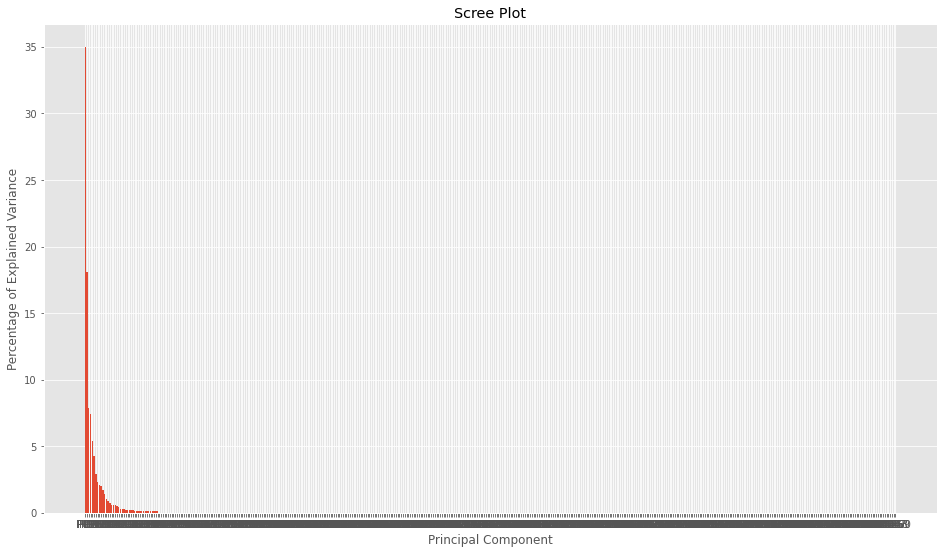

In [220]:
plt.bar(x=range(1, len(per_var_alldataset) + 1 ), height = per_var_alldataset, tick_label = labels_alldataset)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [221]:
#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_alldataset_alldataset = pd.DataFrame(pca_data_alldataset, index = alldataset_dataset_10_10inst.columns , columns = labels_alldataset)

In [222]:
# Loading scores for PC1

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[0], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC1_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC1_df_alldataset = PC1_loading_scores_alldataset.to_frame()
PC1_df_alldataset = PC1_df_alldataset.rename(columns={0: 'Col_1'})
PC1_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC2


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[1], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values


PC2_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC2_df_alldataset = PC2_loading_scores_alldataset.to_frame()
PC2_df_alldataset = PC2_df_alldataset.rename(columns={0: 'Col_1'})
PC2_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC3


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[2], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values
PC3_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC3_df_alldataset = PC3_loading_scores_alldataset.to_frame()
PC3_df_alldataset = PC3_df_alldataset.rename(columns={0: 'Col_1'})
PC3_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC4


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[3], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC4_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC4_df_alldataset = PC4_loading_scores_alldataset.to_frame()
PC4_df_alldataset = PC4_df_alldataset.rename(columns={0: 'Col_1'})
PC4_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC5


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[4], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)
top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC5_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC5_df_alldataset = PC5_loading_scores_alldataset.to_frame()
PC5_df_alldataset = PC5_df_alldataset.rename(columns={0: 'Col_1'})
PC5_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC6


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[5], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC6_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC6_df_alldataset = PC6_loading_scores_alldataset.to_frame()
PC6_df_alldataset = PC6_df_alldataset.rename(columns={0: 'Col_1'})
PC6_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC7


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[6], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC7_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC7_df_alldataset = PC7_loading_scores_alldataset.to_frame()
PC7_df_alldataset = PC7_df_alldataset.rename(columns={0: 'Col_1'})
PC7_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC8


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[7], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC8_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC8_df_alldataset = PC8_loading_scores_alldataset.to_frame()
PC8_df_alldataset = PC8_df_alldataset.rename(columns={0: 'Col_1'})
PC8_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC9

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[8], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC9_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC9_df_alldataset = PC9_loading_scores_alldataset.to_frame()
PC9_df_alldataset = PC9_df_alldataset.rename(columns={0: 'Col_1'})

PC9_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC10

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[9], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC10_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC10_df_alldataset = PC10_loading_scores_alldataset.to_frame()
PC10_df_alldataset = PC10_df_alldataset.rename(columns={0: 'Col_1'})
PC10_df_alldataset.reset_index(level=0, inplace=True)



In [223]:
###########

#calcular qué feature se repite más

PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)

dic = {}
for i in range(100):
    x = list(PCA_10components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_15648\241421543.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_15648\241421543.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)
C:\Users\BRENDA\AppData\Local\

{'feature_199': 1,
 'feature_245': 1,
 'feature_153': 1,
 'feature_291': 1,
 'feature_299': 1,
 'feature_345': 1,
 'feature_107': 1,
 'feature_253': 1,
 'feature_337': 1,
 'feature_207': 1,
 'feature_196': 1,
 'feature_242': 1,
 'feature_194': 1,
 'feature_240': 1,
 'feature_288': 1,
 'feature_150': 1,
 'feature_192': 1,
 'feature_148': 1,
 'feature_238': 1,
 'feature_286': 1,
 'feature_220': 1,
 'feature_228': 1,
 'feature_266': 1,
 'feature_224': 1,
 'feature_274': 1,
 'feature_216': 1,
 'feature_270': 1,
 'feature_174': 1,
 'feature_262': 1,
 'feature_182': 1,
 'feature_260': 1,
 'feature_214': 1,
 'feature_264': 1,
 'feature_218': 1,
 'feature_306': 1,
 'feature_310': 1,
 'feature_168': 1,
 'feature_272': 1,
 'feature_226': 1,
 'feature_172': 1,
 'feature_217': 1,
 'feature_263': 1,
 'feature_171': 1,
 'feature_229': 1,
 'feature_309': 1,
 'feature_221': 1,
 'feature_225': 1,
 'feature_275': 1,
 'feature_183': 1,
 'feature_175': 1,
 'feature_177': 1,
 'feature_173': 1,
 'feature_22

In [224]:
##############################
  #HOW TO CALCULATE WITH PCA ( 10 components )
#############################
	
projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70','PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80','PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90','PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100','PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110','PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120','PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130',
     ' PC131', ' PC132', ' PC133', ' PC134', ' PC135', ' PC136', ' PC137', ' PC138', ' PC139', ' PC140', ' PC141', ' PC142', ' PC143', ' PC144', ' PC145', ' PC146', ' PC147', ' PC148', ' PC149', ' PC150', ' PC151', ' PC152', ' PC153', ' PC154', ' PC155', ' PC156', ' PC157', ' PC158', ' PC159', ' PC160', ' PC161', ' PC162', ' PC163', ' PC164', ' PC165', ' PC166', ' PC167', ' PC168', ' PC169', ' PC170', ' PC171', ' PC172', ' PC173', ' PC174', ' PC175', ' PC176', ' PC177', ' PC178', ' PC179', ' PC180', ' PC181', ' PC182', ' PC183', ' PC184', ' PC185', ' PC186', ' PC187', ' PC188', ' PC189', ' PC190', ' PC191', ' PC192', ' PC193', ' PC194', ' PC195', ' PC196', ' PC197', ' PC198', ' PC199', ' PC200', ' PC201', ' PC202', ' PC203', ' PC204', ' PC205', ' PC206', ' PC207', ' PC208', ' PC209', ' PC210', ' PC211', ' PC212', ' PC213', ' PC214', ' PC215', ' PC216', ' PC217', ' PC218', ' PC219', ' PC220', ' PC221', ' PC222', ' PC223', ' PC224', ' PC225', ' PC226', ' PC227', ' PC228', ' PC229', ' PC230', ' PC231', ' PC232', ' PC233', ' PC234', ' PC235', ' PC236', ' PC237', ' PC238', ' PC239', ' PC240', ' PC241', ' PC242', ' PC243', ' PC244', ' PC245', ' PC246', ' PC247', ' PC248', ' PC249', ' PC250', ' PC251', ' PC252', ' PC253', ' PC254', ' PC255', ' PC256', ' PC257', ' PC258', ' PC259', ' PC260', ' PC261', ' PC262', ' PC263', ' PC264', ' PC265', ' PC266', ' PC267', ' PC268', ' PC269', ' PC270', ' PC271', ' PC272', ' PC273', ' PC274', ' PC275', ' PC276', ' PC277', ' PC278', ' PC279', ' PC280', ' PC281', ' PC282', ' PC283', ' PC284', ' PC285', ' PC286', ' PC287', ' PC288', ' PC289', ' PC290', ' PC291', ' PC292', ' PC293', ' PC294', ' PC295', ' PC296', ' PC297', ' PC298', ' PC299', ' PC300', ' PC301', ' PC302', ' PC303', ' PC304', ' PC305', ' PC306', ' PC307', ' PC308', ' PC309', ' PC310', ' PC311', ' PC312', ' PC313', ' PC314', ' PC315', ' PC316', ' PC317', ' PC318', ' PC319', ' PC320', ' PC321', ' PC322', ' PC323', ' PC324', ' PC325', ' PC326', ' PC327', ' PC328', ' PC329', ' PC330', ' PC331', ' PC332', ' PC333', ' PC334', ' PC335', ' PC336', ' PC337', ' PC338', ' PC339', ' PC340', ' PC341', ' PC342', ' PC343', ' PC344', ' PC345', ' PC346', ' PC347', ' PC348', ' PC349', ' PC350', ' PC351', ' PC352', ' PC353', ' PC354', ' PC355', ' PC356', ' PC357', ' PC358', ' PC359', ' PC360', ' PC361', ' PC362', ' PC363', ' PC364', ' PC365', ' PC366', ' PC367', ' PC368', ' PC369', ' PC370', ' PC371', ' PC372', ' PC373', ' PC374', ' PC375', ' PC376', ' PC377', ' PC378', ' PC379', ' PC380', ' PC381', ' PC382', ' PC383', ' PC384', ' PC385', ' PC386', ' PC387', ' PC388', ' PC389', ' PC390', ' PC391', ' PC392', ' PC393', ' PC394', ' PC395', ' PC396', ' PC397', ' PC398', ' PC399', ' PC400', ' PC401', ' PC402', ' PC403', ' PC404', ' PC405', ' PC406', ' PC407', ' PC408', ' PC409', ' PC410', ' PC411', ' PC412', ' PC413', ' PC414', ' PC415', ' PC416', ' PC417', ' PC418', ' PC419', ' PC420', ' PC421', ' PC422', ' PC423', ' PC424', ' PC425', ' PC426', ' PC427', ' PC428', ' PC429', ' PC430', ' PC431', ' PC432', ' PC433', ' PC434', ' PC435', ' PC436', ' PC437', ' PC438', ' PC439', ' PC440', ' PC441', ' PC442', ' PC443', ' PC444', ' PC445', ' PC446', ' PC447', ' PC448', ' PC449', ' PC450', ' PC451', ' PC452', ' PC453', ' PC454', ' PC455', ' PC456', ' PC457', ' PC458', ' PC459', ' PC460'


    
    
    ],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC451,PC452,PC453,PC454,PC455,PC456,PC457,PC458,PC459,PC460
0,-4.615787,4.181575,-3.607671,-4.616214,0.140732,2.807234,-0.042154,1.151469,-0.314626,-0.248908,...,0.000256,0.000107,-0.001158,0.000103,-0.000531,-0.000207,-0.000544,-0.000309,-0.000453,-0.000113
1,-4.595939,4.183106,-3.711744,-4.662183,0.361831,2.742651,-0.274573,0.828886,-0.613104,-0.271600,...,0.000279,-0.000139,-0.000864,0.000066,-0.000775,-0.000174,-0.000387,-0.000238,-0.000199,-0.000072
2,-4.661137,4.066096,-3.495889,-4.800287,0.451823,2.648722,-0.412859,0.648463,-0.606295,-0.231331,...,-0.000026,0.000050,-0.000984,-0.000077,-0.000450,-0.000206,-0.000597,-0.000272,-0.000234,-0.000098
3,-4.796097,4.088759,-3.500146,-5.052140,0.407256,2.702720,-0.330881,0.855985,-0.252838,-0.201967,...,-0.000058,-0.000146,-0.000640,0.000183,-0.000781,-0.000389,-0.000464,-0.000218,-0.000170,-0.000013
4,-5.000549,4.422673,-3.447473,-4.849933,0.448994,2.492744,-0.328510,1.274936,-0.132343,-0.252845,...,0.000269,0.000108,-0.000905,0.000043,-0.000591,-0.000160,-0.000528,-0.000297,-0.000401,-0.000071


In [225]:
PC10_10_10inst_alldataset = projection_alldataset.iloc[:,0:10]
PC10_10_10inst_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-4.615787,4.181575,-3.607671,-4.616214,0.140732,2.807234,-0.042154,1.151469,-0.314626,-0.248908
1,-4.595939,4.183106,-3.711744,-4.662183,0.361831,2.742651,-0.274573,0.828886,-0.613104,-0.271600
2,-4.661137,4.066096,-3.495889,-4.800287,0.451823,2.648722,-0.412859,0.648463,-0.606295,-0.231331
3,-4.796097,4.088759,-3.500146,-5.052140,0.407256,2.702720,-0.330881,0.855985,-0.252838,-0.201967
4,-5.000549,4.422673,-3.447473,-4.849933,0.448994,2.492744,-0.328510,1.274936,-0.132343,-0.252845


In [226]:

PC10_10_10inst_alldataset.insert(0,"instance",['abuelo_255','abuelo_258','abuelo_262','abuelo_266','abuelo_30'
,'aceptar_185','aceptar_66','ahora_243','ahora_246','ahora_64','ahora_74'
,'ahí_101','ahí_151','ahí_231','alegría_254','alegría_284','alegría_289'
,'ambiente_203','ambiente_229','amigo_105','amigo_171','antes_114'
,'antes_248','antes_283','antes_41','aprender_175','aprender_195'
,'aprender_217','aprender_282','aprender_35','aprender_7','aquí_19'
,'bien_17','bien_174','bien_230','bien_241','bien_244','bien_278'
,'bien_295','bien_39','bien_95','cambiar_50','casa_256','casa_9'
,'controlar_144','controlar_176','controlar_178','controlar_192'
,'crecer_136','cuerpo_51','cuerpo_67','cómo_223','cómo_44','cómo_85'
,'cómo_90','decir_138','decir_265','dejar_129','dejar_131','dentro_55'
,'dibujar_211','dos_280','día_261','edad_60','emoción_143','emoción_145'
,'emoción_188','emoción_249','emoción_250','emoción_272','emoción_281'
,'emoción_286','emoción_43','emoción_45','emoción_54','emoción_71'
,'emoción_81','emoción_93','empezar_219','enojar_102','enojar_107'
,'enojar_124','enojar_276','enojar_99','entender_137','entender_141'
,'familia_204','feliz_274','habitación_267','habitación_270','hacer_191'
,'hermano_100','hermano_116','hermano_150','hermano_169','hola_0'
,'hoy_218','hoy_221','idea_10','ira_285','ira_290','jugar_115','jugar_130'
,'jugar_98','juntos_36','ministerio_11','más o menos_61','necesitar_147'
,'nombre_73','nosotros_181','nosotros_183','nosotros_65','no_108','no_111'
,'objetivo_208','objetivo_220','paciencia_153','paciencia_158','papá_263'
,'papá_27','pensar_189','pensar_97','poder_77','poder_84','preguntar_75'
,'primaria_22','primo_104','profesor_252','que_148','que_190','quinto_23'
,'razón_146','recordar_206','recordar_247','recordar_62','relación_161'
,'relación_163','seguro_18','seguro_21','seleccionar_222','seleccionar_68'
,'semana_180','semana_40','sentir_16','sentir_187','sentir_38','sentir_53'
,'sentir_89','sexto_24','sí_155','sí_157','sí_159','sí_194','sí_200'
,'sí_228','sí_240','sí_242','sí_251','sí_253','sí_277','sí_37','sí_76'
,'sí_79','sí_83','también_201','tener_184','tiempo_49','tiempo_91'
,'tú_172','tú_205','tú_207','tú_288','tú_63','tú_96','uno_260','usar_214'
,'ustedes_239','venir_26','venir_29','venir_31','yo_113','yo_119','yo_121'
,'yo_123','yo_125','yo_140','yo_152','yo_164','yo_193','yo_235','yo_237'
,'yo_3','adentro_150','adentro_677','agrupar_103','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_186','agua_190'
,'agua_202','agua_399','agua_537','agua_95','ahora_463','ahora_690'
,'ahora_739','ahora_793','ahora_801','amarrar_181','amarrar_204'
,'animales_652','animales_675','animales_702','antes_82','antes_89'
,'antes_92','aprender_18','aprender_27','aprender_34','aprender__466'
,'aproximadamente_193','aproximadamente_745','aquí_189','aquí_330'
,'aquí_631','beneficio_384','beneficio_411','bien_147','bien_16'
,'bien_269','bien_288','bien_294','bien_329','bien_337','bien_381'
,'bien_383','bien_401','bien_416','bien_561','bien_626','botar_201'
,'botar_205','brotar_117','brotar_136','buen_0','buen_151','cada uno_563'
,'cada uno_714','cada uno_748','cambiar_108','cambiar_140','carne_111'
,'carne_218','carne_326','carne_423','carne_683','carne_687','carne_698'
,'carne_98','casa_156','casa_19','casa_29','colores_798','colores_813'
,'comer_123','comer_144','comer_146','comer_148','comer_164','comer_231'
,'comer_238','comer_248','comer_286','comer_293','comer_303','comer_309'
,'comer_312','comer_313','comer_323','comer_335','comer_355','comer_382'
,'comer_408','comer_412','comer_414','comer_422','comer_426','comer_437'
,'comer_444','comer_452','comer_470','comer_475','comer_477','comer_484'
,'comer_489','comer_529','comer_560','comer_590','comer_625','comer_644'
,'comer_654','comer_70','comer_705','comer_709','comer_712','comer_743'
,'comer_747','comer_765','comer_779','comer_783','comer_86','conocer_245'
,'conocer_79','conocer_83','contento_516','contento_74','continuar_106'
,'continuar_26','continuar_356','continuar_88','crecer_120','crecer_576'
,'cuaderno_55','cuaderno_810','cuerpo_446','cuerpo_476','cuerpo_597'
,'cuerpo_599','cuerpo_605','cuántos_443','cuántos_620','cuánto_405'
,'cuánto_420','cuánto_445','cuánto_448','cuánto_456','cuánto_460'
,'cuánto_468','cuánto_483','cuánto_703','cuánto_706','cuánto_708'
,'cuánto_733','cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_230'
,'cómo_379','cómo_387','cómo_427','cómo_9','decir_101','decir_224'
,'decir_276','decir_321','decir_433','decir_528','decir_755','decir_789'
,'dentro_241','dentro_369','dentro_371','dentro_457','dentro_486'
,'dentro_532','dentro_566','dentro_580','dentro_596','dentro_603'
,'dentro_627','dentro_647','dentro_664','dentro_692','dentro_73'
,'diariamente_402','diariamente_479','diariamente_785','dibujar_261'
,'diferentes_471','diferentes_569','diferentes_668','diferentes_681'
,'diferentes_689','diferentes_701','diferentes_750','diferentes_84'
,'diferente_454','diferente_71','dos_669','dos_682','día_1','día_197'
,'edad_718','ejercicios_726','ejercicios_728','ella_504','ella_527'
,'ella_616','ellos_559','ellos_746','ellos_754','ellos_767','ellos_772'
,'empezar_32','entonces_364','entonces_480','escribir_56','escribir_60'
,'escribir_62','escribir_797','escribir_807','ese_100','ese_121','ese_138'
,'ese_143','ese_214','ese_380','ese_385','ese_544','ese_608','ese_638'
,'ese_642','ese_697','ese_719','familia_165','familia_45','familia_75'
,'feliz_15','fortalecer_548','fortalecer_582','frijol_132','frijol_175'
,'frijol_216','frijol_434','fuerte_152','fuerte_153','fuerte_240'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_487','fuerte_571','fuerte_584'
,'fuerte_588','fuerte_628','fácil_255','fácil_318','fácil_319','fácil_341'
,'grasa_368','grasa_396','grasa_534','grasa_553','grasa_557','guardar_105'
,'guardar_87','guardar_93','guardar_97','gustar_439','gustar_453'
,'hacer_158','hacer_161','hacer_172','hacer_725','hacer_81','hermano_39'
,'hermano_40','hola_508','hola_509','hola_513','hola_632','hoy_127'
,'hoy_521','hoy_540','idea_21','importante_545','importante_629'
,'importante_636','interesante_113','interesante_610','juntos_517'
,'juntos_519','juntos_618','juntos_621','llamar_46','llamar_614','mal_250'
,'mal_273','mal_287','mal_299','mal_301','mal_334','mal_336'
,'ministerio_23','más o menos_752','más o menos_763','más o menos_766'
,'más o menos_780','necesitar_474','necesitar_713','necesitar_734'
,'niños_2','niños_510','niños_736','niños_749','niños_756','niños_770'
,'niños_776','nombre_7','no_166','no_289','no_297','no_333','no_386'
,'no_462','no_667','o_195','o_272','o_722','pensar_213','pensar_235'
,'pensar_339','pensar_378','pensar_406','pensar_450','pensar_461'
,'pensar_600','pensar_61','pensar_613','pensar_623','pensar_640'
,'pensar_641','pensar_66','pensar_753','pensar_761','pensar_771'
,'pensar_777','pero_376','pero_442','pero_496','pero_611','pero_660'
,'planta_119','planta_133','planta_142','planta_159','planta_173'
,'planta_215','planta_217','planta_435','poder_162','poder_645'
,'porcentaje_491','porcentaje_495','porcentaje_507','porción_421'
,'porción_425','preguntar_732','preguntas_236','preguntas_59','primaria_5'
,'primaria_760','primaria_775','primo_38','probar_254','probar_317'
,'probar_67','proceso_170','proceso_351','profesor_501','profesor_817'
,'proteínas_370','proteínas_572','proteínas_648','proteínas_656'
,'proteínas_676','proteínas_694','proteínas_784','proteína_393'
,'proteína_531','proteína_704','quinto_3','quinto_737','quinto_758'
,'quinto_773','qué_212','qué_274','qué_304','qué_417','qué_573','qué_727'
,'qué_731','qué__131','razón_658','recordar_169','saludable_227'
,'saludable__233','salud_239','salud_271','salud_345','seco_222'
,'seco_699','semana_64','sentir_14','sentir_149','sentir_458','sentir_547'
,'sentir_570','sentir_591','sentir_602','sentir_604','ser_226','ser_342'
,'sexto_4','sexto_738','sexto_759','sexto_774','solo_661','solo_663'
,'sí_278','sí_281','sí_284','sí_291','sí_306','sí_315','sí_359','sí_419'
,'sí_565','sí_633','sí_657','sí_659','sí__228','también_114','también_124'
,'también_182','también_552','también_595','también_598','también_799'
,'tener_530','todo_320','todo_327','todo_511','todo_58','todo_606'
,'tú_154','tú_168','tú_176','tú_229','tú_243','tú_247','tú_263','tú_277'
,'tú_390','tú_407','tú_53','tú_619','tú_635','tú_639','tú_691','tú_711'
,'tú_740','tú_762','tú_778','tú_791','tú_80','tú_803','uno_666','uno_674'
,'usar_90','ustedes_520','vaca_653','vaca_662','vaca_688','vaca_700'
,'valor_469','valor_485','valor_764','venir_54','venir_617','venir_806'
,'venir_818','ver_128','ver_264','ver_279','ver_49','ver_494','ver_622'
,'ya_115','ya_125','ya_30','ya_35','ya_350','ya_78','yo_630','él_260'
,'él_280','él_285','él_290','él_295','él_302','él_311','él_500','él_524'
],True)

In [227]:
PC10_10_10inst_alldataset['classes'] = PC10_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_15648\2242510311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_alldataset['classes'] = PC10_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])


In [228]:
PC10_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC10_10_10inst_alldataset.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_15648\3033980328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_alldataset.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,-4.615787,4.181575,-3.607671,-4.616214,0.140732,2.807234,-0.042154,1.151469,-0.314626,-0.248908,abuelo
1,-4.595939,4.183106,-3.711744,-4.662183,0.361831,2.742651,-0.274573,0.828886,-0.613104,-0.271600,abuelo
2,-4.661137,4.066096,-3.495889,-4.800287,0.451823,2.648722,-0.412859,0.648463,-0.606295,-0.231331,abuelo
3,-4.796097,4.088759,-3.500146,-5.052140,0.407256,2.702720,-0.330881,0.855985,-0.252838,-0.201967,abuelo
4,-5.000549,4.422673,-3.447473,-4.849933,0.448994,2.492744,-0.328510,1.274936,-0.132343,-0.252845,abuelo


In [229]:
print(pd.unique(PC10_10_10inst_alldataset['classes']))

X_PC10_10_10inst_alldataset= PC10_10_10inst_alldataset.iloc[:,:-1].values
y_PC10_10_10inst_alldataset=  PC10_10_10inst_alldataset.iloc[:,-1].values

['abuelo' 'aceptar' 'ahora' 'ahí' 'alegría' 'ambiente' 'amigo' 'antes'
 'aprender' 'aquí' 'bien' 'cambiar' 'casa' 'controlar' 'crecer' 'cuerpo'
 'cómo' 'decir' 'dejar' 'dentro' 'dibujar' 'dos' 'día' 'edad' 'emoción'
 'empezar' 'enojar' 'entender' 'familia' 'feliz' 'habitación' 'hacer'
 'hermano' 'hola' 'hoy' 'idea' 'ira' 'jugar' 'juntos' 'ministerio'
 'más o menos' 'necesitar' 'nombre' 'nosotros' 'no' 'objetivo' 'paciencia'
 'papá' 'pensar' 'poder' 'preguntar' 'primaria' 'primo' 'profesor' 'que'
 'quinto' 'razón' 'recordar' 'relación' 'seguro' 'seleccionar' 'semana'
 'sentir' 'sexto' 'sí' 'también' 'tener' 'tiempo' 'tú' 'uno' 'usar'
 'ustedes' 'venir' 'yo' 'adentro' 'agrupar' 'agua' 'amarrar' 'animales'
 'aproximadamente' 'beneficio' 'botar' 'brotar' 'buen' 'cada uno' 'carne'
 'colores' 'comer' 'conocer' 'contento' 'continuar' 'cuaderno' 'cuántos'
 'cuánto' 'diariamente' 'diferentes' 'diferente' 'ejercicios' 'ella'
 'ellos' 'entonces' 'escribir' 'ese' 'fortalecer' 'frijol' 'fuerte'
 'f

In [230]:
Labelencoder_Y = LabelEncoder()
y_PC10_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC10_10_10inst_alldataset)
y_PC10_10_10inst_alldataset

array(['abuelo', 'abuelo', 'abuelo', 'abuelo', 'abuelo', 'aceptar',
       'aceptar', 'ahora', 'ahora', 'ahora', 'ahora', 'ahí', 'ahí', 'ahí',
       'alegría', 'alegría', 'alegría', 'ambiente', 'ambiente', 'amigo',
       'amigo', 'antes', 'antes', 'antes', 'antes', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender', 'aquí',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien',
       'bien', 'cambiar', 'casa', 'casa', 'controlar', 'controlar',
       'controlar', 'controlar', 'crecer', 'cuerpo', 'cuerpo', 'cómo',
       'cómo', 'cómo', 'cómo', 'decir', 'decir', 'dejar', 'dejar',
       'dentro', 'dibujar', 'dos', 'día', 'edad', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'empezar', 'enojar', 'enojar', 'enojar', 'enojar', 'enojar',
       'entender', 'entender', 'familia', 'feliz', 'habitación',
       'habitació

In [231]:
X_train_PC10_10_10inst_alldataset, X_test_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset = train_test_split(X_PC10_10_10inst_alldataset, y_PC10_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_10_10inst_alldataset = scaler.fit_transform(X_train_PC10_10_10inst_alldataset)
X_test_PC10_10_10inst_alldataset = scaler.transform(X_test_PC10_10_10inst_alldataset)

'''
- 1 pandas dataframe , split it in training and testing
- First split and then filtering/cleaning, choosing frames and top_10_instances_alldataset 
'''

'\n- 1 pandas dataframe , split it in training and testing\n- First split and then filtering/cleaning, choosing frames and top_10_instances_alldataset \n'

([<matplotlib.axis.XTick at 0x1d006b7c6d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

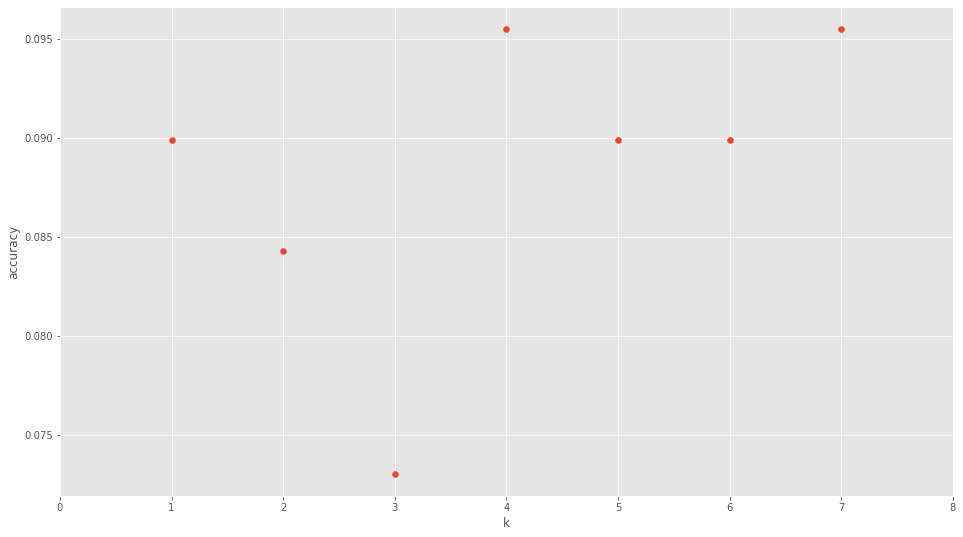

In [232]:
k_range_PC10_10_10inst_alldataset = range(1, 8)
scores_PC10_10_10inst_alldataset = []
for k in k_range_PC10_10_10inst_alldataset:
    knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
    scores_PC10_10_10inst_alldataset.append(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_10_10inst_alldataset, scores_PC10_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.09


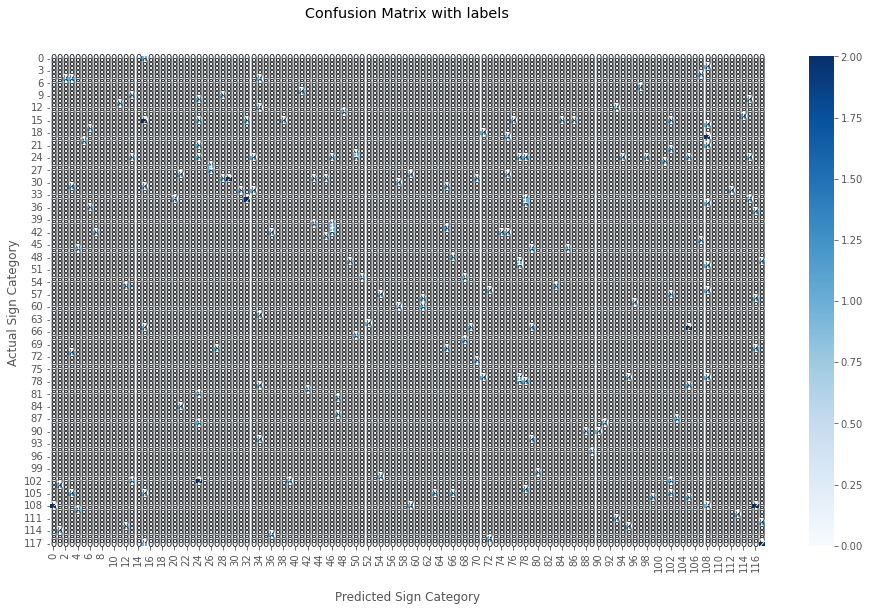

In [233]:
n_neighbors_PC10_10_10inst_alldataset = 1
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.54
Accuracy of K-NN classifier on test set: 0.08


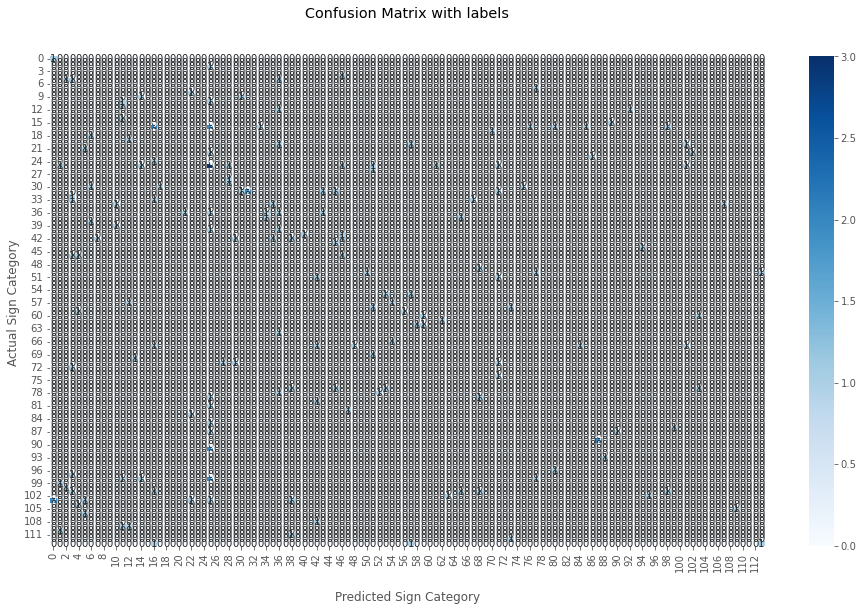

In [234]:
n_neighbors_PC10_10_10inst_alldataset = 2
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.40
Accuracy of K-NN classifier on test set: 0.07


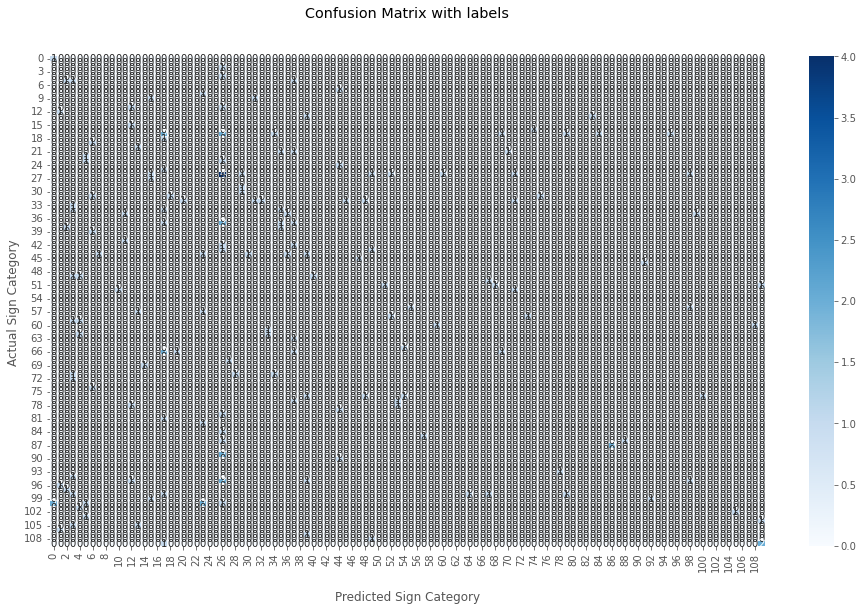

In [235]:
n_neighbors_PC10_10_10inst_alldataset = 3
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.29
Accuracy of K-NN classifier on test set: 0.09


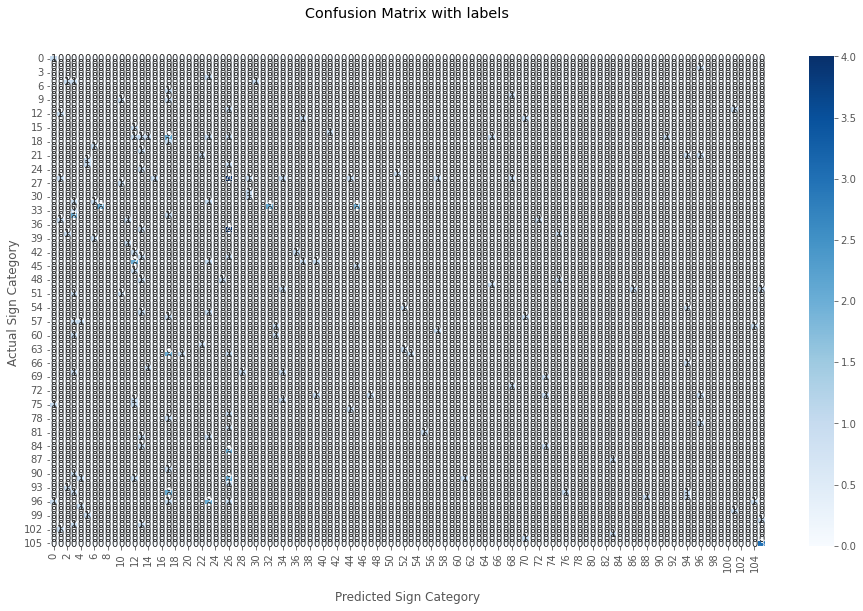

In [236]:
n_neighbors_PC10_10_10inst_alldataset = 5
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [237]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################

projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40', 'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70','PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80','PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90','PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100','PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110','PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120','PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130',
    'PC131', 'PC132', 'PC133', ' PC134', ' PC135', ' PC136', ' PC137', ' PC138', ' PC139', ' PC140', ' PC141', ' PC142', ' PC143', ' PC144', ' PC145', ' PC146', ' PC147', ' PC148', ' PC149', ' PC150', ' PC151', ' PC152', ' PC153', ' PC154', ' PC155', ' PC156', ' PC157', ' PC158', ' PC159', ' PC160', ' PC161', ' PC162', ' PC163', ' PC164', ' PC165', ' PC166', ' PC167', ' PC168', ' PC169', ' PC170', ' PC171', ' PC172', ' PC173', ' PC174', ' PC175', ' PC176', ' PC177', ' PC178', ' PC179', ' PC180', ' PC181', ' PC182', ' PC183', ' PC184', ' PC185', ' PC186', ' PC187', ' PC188', ' PC189', ' PC190', ' PC191', ' PC192', ' PC193', ' PC194', ' PC195', ' PC196', ' PC197', ' PC198', ' PC199', ' PC200', ' PC201', ' PC202', ' PC203', ' PC204', ' PC205', ' PC206', ' PC207', ' PC208', ' PC209', ' PC210', ' PC211', ' PC212', ' PC213', ' PC214', ' PC215', ' PC216', ' PC217', ' PC218', ' PC219', ' PC220', ' PC221', ' PC222', ' PC223', ' PC224', ' PC225', ' PC226', ' PC227', ' PC228', ' PC229', ' PC230', ' PC231', ' PC232', ' PC233', ' PC234', ' PC235', ' PC236', ' PC237', ' PC238', ' PC239', ' PC240', ' PC241', ' PC242', ' PC243', ' PC244', ' PC245', ' PC246', ' PC247', ' PC248', ' PC249', ' PC250', ' PC251', ' PC252', ' PC253', ' PC254', ' PC255', ' PC256', ' PC257', ' PC258', ' PC259', ' PC260', ' PC261', ' PC262', ' PC263', ' PC264', ' PC265', ' PC266', ' PC267', ' PC268', ' PC269', ' PC270', ' PC271', ' PC272', ' PC273', ' PC274', ' PC275', ' PC276', ' PC277', ' PC278', ' PC279', ' PC280', ' PC281', ' PC282', ' PC283', ' PC284', ' PC285', ' PC286', ' PC287', ' PC288', ' PC289', ' PC290', ' PC291', ' PC292', ' PC293', ' PC294', ' PC295', ' PC296', ' PC297', ' PC298', ' PC299', ' PC300', ' PC301', ' PC302', ' PC303', ' PC304', ' PC305', ' PC306', ' PC307', ' PC308', ' PC309', ' PC310', ' PC311', ' PC312', ' PC313', ' PC314', ' PC315', ' PC316', ' PC317', ' PC318', ' PC319', ' PC320', ' PC321', ' PC322', ' PC323', ' PC324', ' PC325', ' PC326', ' PC327', ' PC328', ' PC329', ' PC330', ' PC331', ' PC332', ' PC333', ' PC334', ' PC335', ' PC336', ' PC337', ' PC338', ' PC339', ' PC340', ' PC341', ' PC342', ' PC343', ' PC344', ' PC345', ' PC346', ' PC347', ' PC348', ' PC349', ' PC350', ' PC351', ' PC352', ' PC353', ' PC354', ' PC355', ' PC356', ' PC357', ' PC358', ' PC359', ' PC360', ' PC361', ' PC362', ' PC363', ' PC364', ' PC365', ' PC366', ' PC367', ' PC368', ' PC369', ' PC370', ' PC371', ' PC372', ' PC373', ' PC374', ' PC375', ' PC376', ' PC377', ' PC378', ' PC379', ' PC380', ' PC381', ' PC382', ' PC383', ' PC384', ' PC385', ' PC386', ' PC387', ' PC388', ' PC389', ' PC390', ' PC391', ' PC392', ' PC393', ' PC394', ' PC395', ' PC396', ' PC397', ' PC398', ' PC399', ' PC400', ' PC401', ' PC402', ' PC403', ' PC404', ' PC405', ' PC406', ' PC407', ' PC408', ' PC409', ' PC410', ' PC411', ' PC412', ' PC413', ' PC414', ' PC415', ' PC416', ' PC417', ' PC418', ' PC419', ' PC420', ' PC421', ' PC422', ' PC423', ' PC424', ' PC425', ' PC426', ' PC427', ' PC428', ' PC429', ' PC430', ' PC431', ' PC432', ' PC433', ' PC434', ' PC435', ' PC436', ' PC437', ' PC438', ' PC439', ' PC440', ' PC441', ' PC442', ' PC443', ' PC444', ' PC445', ' PC446', ' PC447', ' PC448', ' PC449', ' PC450', ' PC451', ' PC452', ' PC453', ' PC454', ' PC455', ' PC456', ' PC457', ' PC458', ' PC459', ' PC460'
    
    ],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC451,PC452,PC453,PC454,PC455,PC456,PC457,PC458,PC459,PC460
0,-4.615787,4.181575,-3.607671,-4.616214,0.140732,2.807234,-0.042154,1.151469,-0.314626,-0.248908,...,0.000256,0.000107,-0.001158,0.000103,-0.000531,-0.000207,-0.000544,-0.000309,-0.000453,-0.000113
1,-4.595939,4.183106,-3.711744,-4.662183,0.361831,2.742651,-0.274573,0.828886,-0.613104,-0.271600,...,0.000279,-0.000139,-0.000864,0.000066,-0.000775,-0.000174,-0.000387,-0.000238,-0.000199,-0.000072
2,-4.661137,4.066096,-3.495889,-4.800287,0.451823,2.648722,-0.412859,0.648463,-0.606295,-0.231331,...,-0.000026,0.000050,-0.000984,-0.000077,-0.000450,-0.000206,-0.000597,-0.000272,-0.000234,-0.000098
3,-4.796097,4.088759,-3.500146,-5.052140,0.407256,2.702720,-0.330881,0.855985,-0.252838,-0.201967,...,-0.000058,-0.000146,-0.000640,0.000183,-0.000781,-0.000389,-0.000464,-0.000218,-0.000170,-0.000013
4,-5.000549,4.422673,-3.447473,-4.849933,0.448994,2.492744,-0.328510,1.274936,-0.132343,-0.252845,...,0.000269,0.000108,-0.000905,0.000043,-0.000591,-0.000160,-0.000528,-0.000297,-0.000401,-0.000071


In [238]:
PC6_10_10inst_alldataset = projection_alldataset.iloc[:,0:6]
PC6_10_10inst_alldataset.head()

PC6_10_10inst_alldataset.insert(0,"instance",['abuelo_255','abuelo_258','abuelo_262','abuelo_266','abuelo_30'
,'aceptar_185','aceptar_66','ahora_243','ahora_246','ahora_64','ahora_74'
,'ahí_101','ahí_151','ahí_231','alegría_254','alegría_284','alegría_289'
,'ambiente_203','ambiente_229','amigo_105','amigo_171','antes_114'
,'antes_248','antes_283','antes_41','aprender_175','aprender_195'
,'aprender_217','aprender_282','aprender_35','aprender_7','aquí_19'
,'bien_17','bien_174','bien_230','bien_241','bien_244','bien_278'
,'bien_295','bien_39','bien_95','cambiar_50','casa_256','casa_9'
,'controlar_144','controlar_176','controlar_178','controlar_192'
,'crecer_136','cuerpo_51','cuerpo_67','cómo_223','cómo_44','cómo_85'
,'cómo_90','decir_138','decir_265','dejar_129','dejar_131','dentro_55'
,'dibujar_211','dos_280','día_261','edad_60','emoción_143','emoción_145'
,'emoción_188','emoción_249','emoción_250','emoción_272','emoción_281'
,'emoción_286','emoción_43','emoción_45','emoción_54','emoción_71'
,'emoción_81','emoción_93','empezar_219','enojar_102','enojar_107'
,'enojar_124','enojar_276','enojar_99','entender_137','entender_141'
,'familia_204','feliz_274','habitación_267','habitación_270','hacer_191'
,'hermano_100','hermano_116','hermano_150','hermano_169','hola_0'
,'hoy_218','hoy_221','idea_10','ira_285','ira_290','jugar_115','jugar_130'
,'jugar_98','juntos_36','ministerio_11','más o menos_61','necesitar_147'
,'nombre_73','nosotros_181','nosotros_183','nosotros_65','no_108','no_111'
,'objetivo_208','objetivo_220','paciencia_153','paciencia_158','papá_263'
,'papá_27','pensar_189','pensar_97','poder_77','poder_84','preguntar_75'
,'primaria_22','primo_104','profesor_252','que_148','que_190','quinto_23'
,'razón_146','recordar_206','recordar_247','recordar_62','relación_161'
,'relación_163','seguro_18','seguro_21','seleccionar_222','seleccionar_68'
,'semana_180','semana_40','sentir_16','sentir_187','sentir_38','sentir_53'
,'sentir_89','sexto_24','sí_155','sí_157','sí_159','sí_194','sí_200'
,'sí_228','sí_240','sí_242','sí_251','sí_253','sí_277','sí_37','sí_76'
,'sí_79','sí_83','también_201','tener_184','tiempo_49','tiempo_91'
,'tú_172','tú_205','tú_207','tú_288','tú_63','tú_96','uno_260','usar_214'
,'ustedes_239','venir_26','venir_29','venir_31','yo_113','yo_119','yo_121'
,'yo_123','yo_125','yo_140','yo_152','yo_164','yo_193','yo_235','yo_237'
,'yo_3','adentro_150','adentro_677','agrupar_103','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_186','agua_190'
,'agua_202','agua_399','agua_537','agua_95','ahora_463','ahora_690'
,'ahora_739','ahora_793','ahora_801','amarrar_181','amarrar_204'
,'animales_652','animales_675','animales_702','antes_82','antes_89'
,'antes_92','aprender_18','aprender_27','aprender_34','aprender__466'
,'aproximadamente_193','aproximadamente_745','aquí_189','aquí_330'
,'aquí_631','beneficio_384','beneficio_411','bien_147','bien_16'
,'bien_269','bien_288','bien_294','bien_329','bien_337','bien_381'
,'bien_383','bien_401','bien_416','bien_561','bien_626','botar_201'
,'botar_205','brotar_117','brotar_136','buen_0','buen_151','cada uno_563'
,'cada uno_714','cada uno_748','cambiar_108','cambiar_140','carne_111'
,'carne_218','carne_326','carne_423','carne_683','carne_687','carne_698'
,'carne_98','casa_156','casa_19','casa_29','colores_798','colores_813'
,'comer_123','comer_144','comer_146','comer_148','comer_164','comer_231'
,'comer_238','comer_248','comer_286','comer_293','comer_303','comer_309'
,'comer_312','comer_313','comer_323','comer_335','comer_355','comer_382'
,'comer_408','comer_412','comer_414','comer_422','comer_426','comer_437'
,'comer_444','comer_452','comer_470','comer_475','comer_477','comer_484'
,'comer_489','comer_529','comer_560','comer_590','comer_625','comer_644'
,'comer_654','comer_70','comer_705','comer_709','comer_712','comer_743'
,'comer_747','comer_765','comer_779','comer_783','comer_86','conocer_245'
,'conocer_79','conocer_83','contento_516','contento_74','continuar_106'
,'continuar_26','continuar_356','continuar_88','crecer_120','crecer_576'
,'cuaderno_55','cuaderno_810','cuerpo_446','cuerpo_476','cuerpo_597'
,'cuerpo_599','cuerpo_605','cuántos_443','cuántos_620','cuánto_405'
,'cuánto_420','cuánto_445','cuánto_448','cuánto_456','cuánto_460'
,'cuánto_468','cuánto_483','cuánto_703','cuánto_706','cuánto_708'
,'cuánto_733','cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_230'
,'cómo_379','cómo_387','cómo_427','cómo_9','decir_101','decir_224'
,'decir_276','decir_321','decir_433','decir_528','decir_755','decir_789'
,'dentro_241','dentro_369','dentro_371','dentro_457','dentro_486'
,'dentro_532','dentro_566','dentro_580','dentro_596','dentro_603'
,'dentro_627','dentro_647','dentro_664','dentro_692','dentro_73'
,'diariamente_402','diariamente_479','diariamente_785','dibujar_261'
,'diferentes_471','diferentes_569','diferentes_668','diferentes_681'
,'diferentes_689','diferentes_701','diferentes_750','diferentes_84'
,'diferente_454','diferente_71','dos_669','dos_682','día_1','día_197'
,'edad_718','ejercicios_726','ejercicios_728','ella_504','ella_527'
,'ella_616','ellos_559','ellos_746','ellos_754','ellos_767','ellos_772'
,'empezar_32','entonces_364','entonces_480','escribir_56','escribir_60'
,'escribir_62','escribir_797','escribir_807','ese_100','ese_121','ese_138'
,'ese_143','ese_214','ese_380','ese_385','ese_544','ese_608','ese_638'
,'ese_642','ese_697','ese_719','familia_165','familia_45','familia_75'
,'feliz_15','fortalecer_548','fortalecer_582','frijol_132','frijol_175'
,'frijol_216','frijol_434','fuerte_152','fuerte_153','fuerte_240'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_487','fuerte_571','fuerte_584'
,'fuerte_588','fuerte_628','fácil_255','fácil_318','fácil_319','fácil_341'
,'grasa_368','grasa_396','grasa_534','grasa_553','grasa_557','guardar_105'
,'guardar_87','guardar_93','guardar_97','gustar_439','gustar_453'
,'hacer_158','hacer_161','hacer_172','hacer_725','hacer_81','hermano_39'
,'hermano_40','hola_508','hola_509','hola_513','hola_632','hoy_127'
,'hoy_521','hoy_540','idea_21','importante_545','importante_629'
,'importante_636','interesante_113','interesante_610','juntos_517'
,'juntos_519','juntos_618','juntos_621','llamar_46','llamar_614','mal_250'
,'mal_273','mal_287','mal_299','mal_301','mal_334','mal_336'
,'ministerio_23','más o menos_752','más o menos_763','más o menos_766'
,'más o menos_780','necesitar_474','necesitar_713','necesitar_734'
,'niños_2','niños_510','niños_736','niños_749','niños_756','niños_770'
,'niños_776','nombre_7','no_166','no_289','no_297','no_333','no_386'
,'no_462','no_667','o_195','o_272','o_722','pensar_213','pensar_235'
,'pensar_339','pensar_378','pensar_406','pensar_450','pensar_461'
,'pensar_600','pensar_61','pensar_613','pensar_623','pensar_640'
,'pensar_641','pensar_66','pensar_753','pensar_761','pensar_771'
,'pensar_777','pero_376','pero_442','pero_496','pero_611','pero_660'
,'planta_119','planta_133','planta_142','planta_159','planta_173'
,'planta_215','planta_217','planta_435','poder_162','poder_645'
,'porcentaje_491','porcentaje_495','porcentaje_507','porción_421'
,'porción_425','preguntar_732','preguntas_236','preguntas_59','primaria_5'
,'primaria_760','primaria_775','primo_38','probar_254','probar_317'
,'probar_67','proceso_170','proceso_351','profesor_501','profesor_817'
,'proteínas_370','proteínas_572','proteínas_648','proteínas_656'
,'proteínas_676','proteínas_694','proteínas_784','proteína_393'
,'proteína_531','proteína_704','quinto_3','quinto_737','quinto_758'
,'quinto_773','qué_212','qué_274','qué_304','qué_417','qué_573','qué_727'
,'qué_731','qué__131','razón_658','recordar_169','saludable_227'
,'saludable__233','salud_239','salud_271','salud_345','seco_222'
,'seco_699','semana_64','sentir_14','sentir_149','sentir_458','sentir_547'
,'sentir_570','sentir_591','sentir_602','sentir_604','ser_226','ser_342'
,'sexto_4','sexto_738','sexto_759','sexto_774','solo_661','solo_663'
,'sí_278','sí_281','sí_284','sí_291','sí_306','sí_315','sí_359','sí_419'
,'sí_565','sí_633','sí_657','sí_659','sí__228','también_114','también_124'
,'también_182','también_552','también_595','también_598','también_799'
,'tener_530','todo_320','todo_327','todo_511','todo_58','todo_606'
,'tú_154','tú_168','tú_176','tú_229','tú_243','tú_247','tú_263','tú_277'
,'tú_390','tú_407','tú_53','tú_619','tú_635','tú_639','tú_691','tú_711'
,'tú_740','tú_762','tú_778','tú_791','tú_80','tú_803','uno_666','uno_674'
,'usar_90','ustedes_520','vaca_653','vaca_662','vaca_688','vaca_700'
,'valor_469','valor_485','valor_764','venir_54','venir_617','venir_806'
,'venir_818','ver_128','ver_264','ver_279','ver_49','ver_494','ver_622'
,'ya_115','ya_125','ya_30','ya_35','ya_350','ya_78','yo_630','él_260'
,'él_280','él_285','él_290','él_295','él_302','él_311','él_500','él_524'
],True)

In [239]:
PC6_10_10inst_alldataset['classes'] = PC6_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_15648\3551985106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_alldataset['classes'] = PC6_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])


In [240]:
PC6_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC6_10_10inst_alldataset.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_15648\1954860938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_alldataset.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,-4.615787,4.181575,-3.607671,-4.616214,0.140732,2.807234,abuelo
1,-4.595939,4.183106,-3.711744,-4.662183,0.361831,2.742651,abuelo
2,-4.661137,4.066096,-3.495889,-4.800287,0.451823,2.648722,abuelo
3,-4.796097,4.088759,-3.500146,-5.052140,0.407256,2.702720,abuelo
4,-5.000549,4.422673,-3.447473,-4.849933,0.448994,2.492744,abuelo


In [241]:
print(pd.unique(PC6_10_10inst_alldataset['classes']))

X_PC6_10_10inst_alldataset= PC6_10_10inst_alldataset.iloc[:,:-1].values
y_PC6_10_10inst_alldataset=  PC6_10_10inst_alldataset.iloc[:,-1].values

['abuelo' 'aceptar' 'ahora' 'ahí' 'alegría' 'ambiente' 'amigo' 'antes'
 'aprender' 'aquí' 'bien' 'cambiar' 'casa' 'controlar' 'crecer' 'cuerpo'
 'cómo' 'decir' 'dejar' 'dentro' 'dibujar' 'dos' 'día' 'edad' 'emoción'
 'empezar' 'enojar' 'entender' 'familia' 'feliz' 'habitación' 'hacer'
 'hermano' 'hola' 'hoy' 'idea' 'ira' 'jugar' 'juntos' 'ministerio'
 'más o menos' 'necesitar' 'nombre' 'nosotros' 'no' 'objetivo' 'paciencia'
 'papá' 'pensar' 'poder' 'preguntar' 'primaria' 'primo' 'profesor' 'que'
 'quinto' 'razón' 'recordar' 'relación' 'seguro' 'seleccionar' 'semana'
 'sentir' 'sexto' 'sí' 'también' 'tener' 'tiempo' 'tú' 'uno' 'usar'
 'ustedes' 'venir' 'yo' 'adentro' 'agrupar' 'agua' 'amarrar' 'animales'
 'aproximadamente' 'beneficio' 'botar' 'brotar' 'buen' 'cada uno' 'carne'
 'colores' 'comer' 'conocer' 'contento' 'continuar' 'cuaderno' 'cuántos'
 'cuánto' 'diariamente' 'diferentes' 'diferente' 'ejercicios' 'ella'
 'ellos' 'entonces' 'escribir' 'ese' 'fortalecer' 'frijol' 'fuerte'
 'f

In [242]:
Labelencoder_Y = LabelEncoder()
y_PC6_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC6_10_10inst_alldataset)
y_PC6_10_10inst_alldataset

array(['abuelo', 'abuelo', 'abuelo', 'abuelo', 'abuelo', 'aceptar',
       'aceptar', 'ahora', 'ahora', 'ahora', 'ahora', 'ahí', 'ahí', 'ahí',
       'alegría', 'alegría', 'alegría', 'ambiente', 'ambiente', 'amigo',
       'amigo', 'antes', 'antes', 'antes', 'antes', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender', 'aquí',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien',
       'bien', 'cambiar', 'casa', 'casa', 'controlar', 'controlar',
       'controlar', 'controlar', 'crecer', 'cuerpo', 'cuerpo', 'cómo',
       'cómo', 'cómo', 'cómo', 'decir', 'decir', 'dejar', 'dejar',
       'dentro', 'dibujar', 'dos', 'día', 'edad', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'empezar', 'enojar', 'enojar', 'enojar', 'enojar', 'enojar',
       'entender', 'entender', 'familia', 'feliz', 'habitación',
       'habitació

In [243]:
X_train_PC6_10_10inst_alldataset, X_test_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset = train_test_split(X_PC6_10_10inst_alldataset, y_PC6_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_10_10inst_alldataset = scaler.fit_transform(X_train_PC6_10_10inst_alldataset)
X_test_PC6_10_10inst_alldataset = scaler.transform(X_test_PC6_10_10inst_alldataset)

([<matplotlib.axis.XTick at 0x1d077a37fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

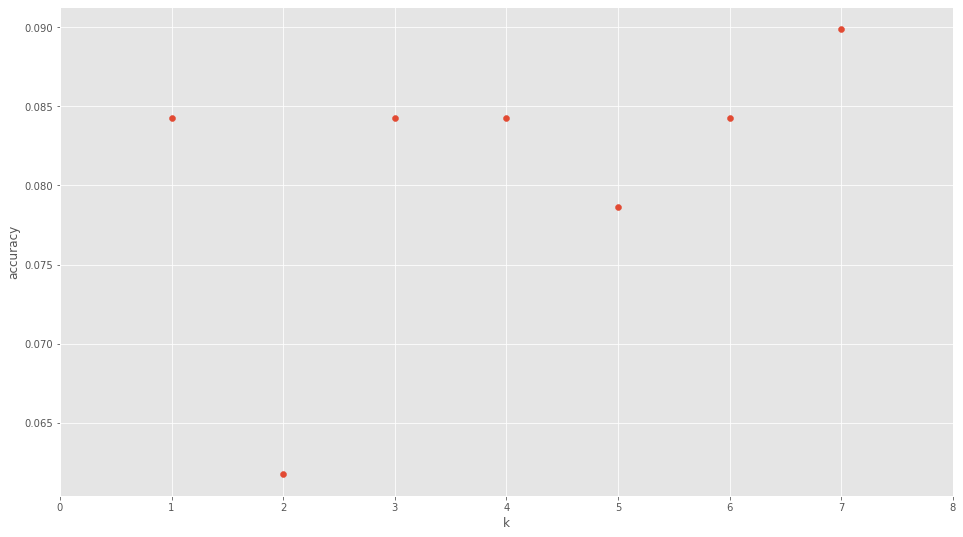

In [244]:
k_range_PC6_10_10inst_alldataset = range(1, 8)
scores_PC6_10_10inst_alldataset = []
for k in k_range_PC6_10_10inst_alldataset:
    knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
    scores_PC6_10_10inst_alldataset.append(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_10_10inst_alldataset, scores_PC6_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.08


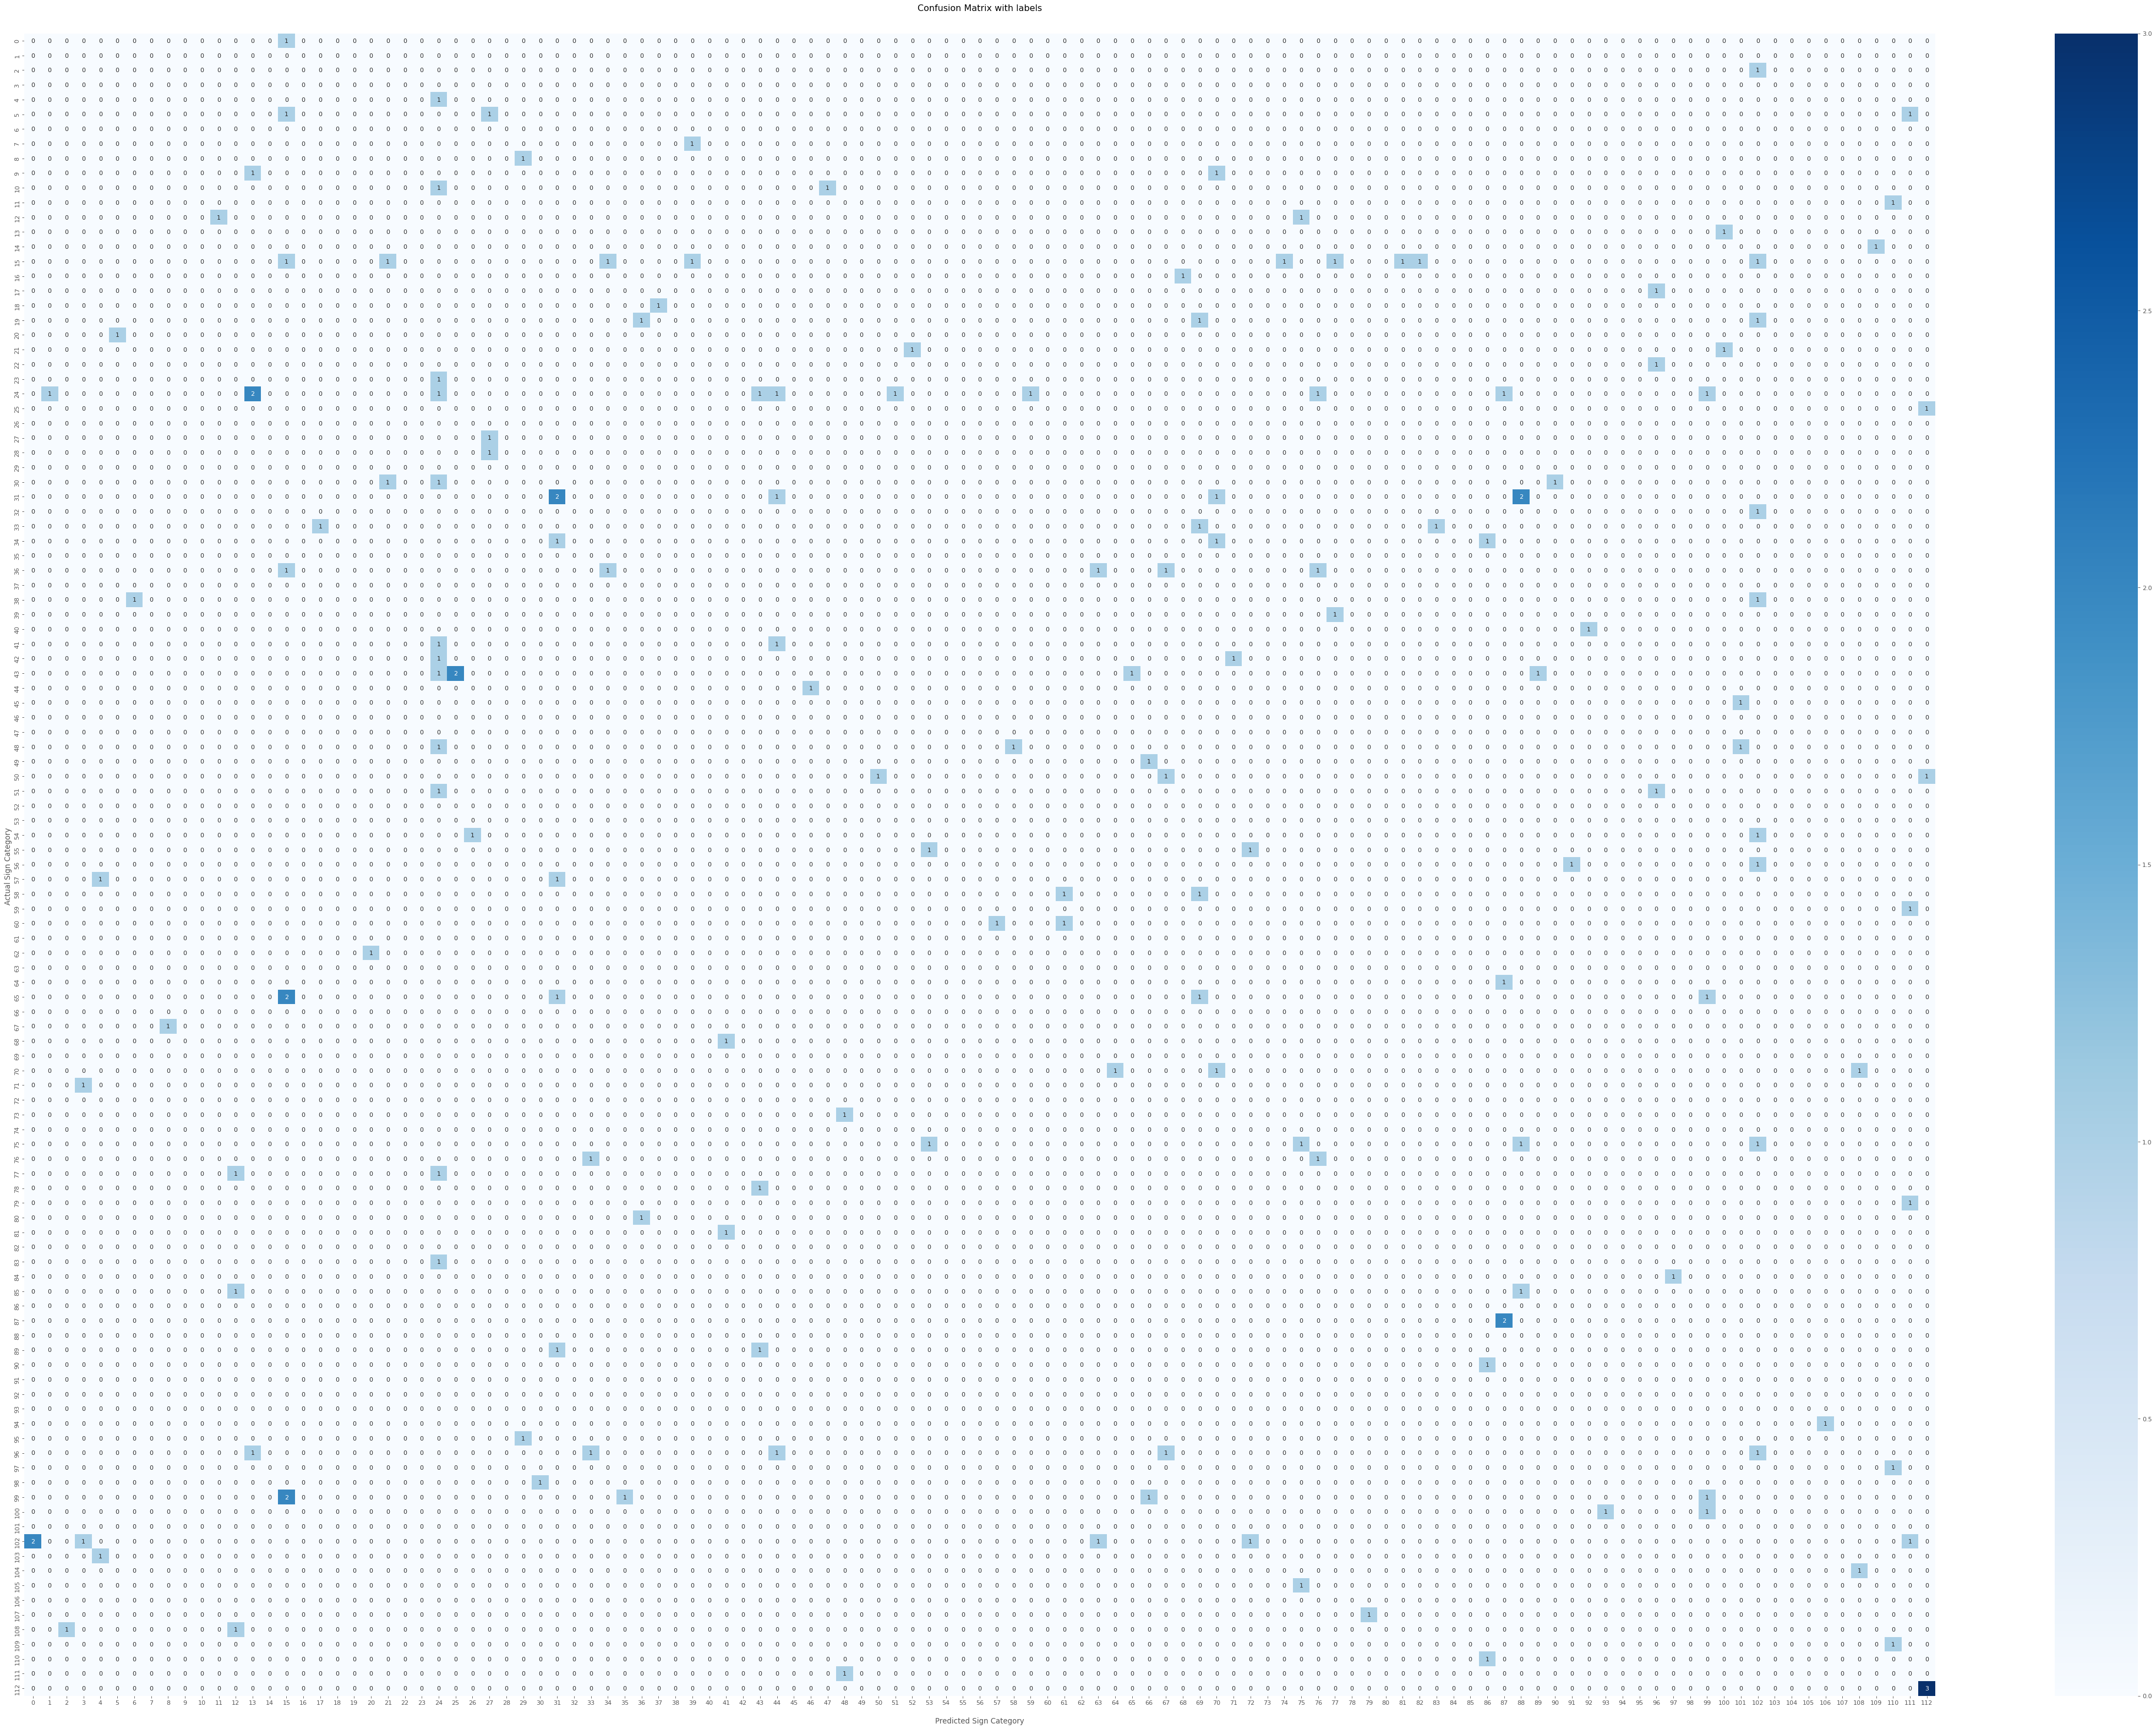

In [251]:
from matplotlib.pyplot import figure

figure(figsize=(70, 50), dpi=80)

n_neighbors_PC6_10_10inst_alldataset = 1
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.53
Accuracy of K-NN classifier on test set: 0.06


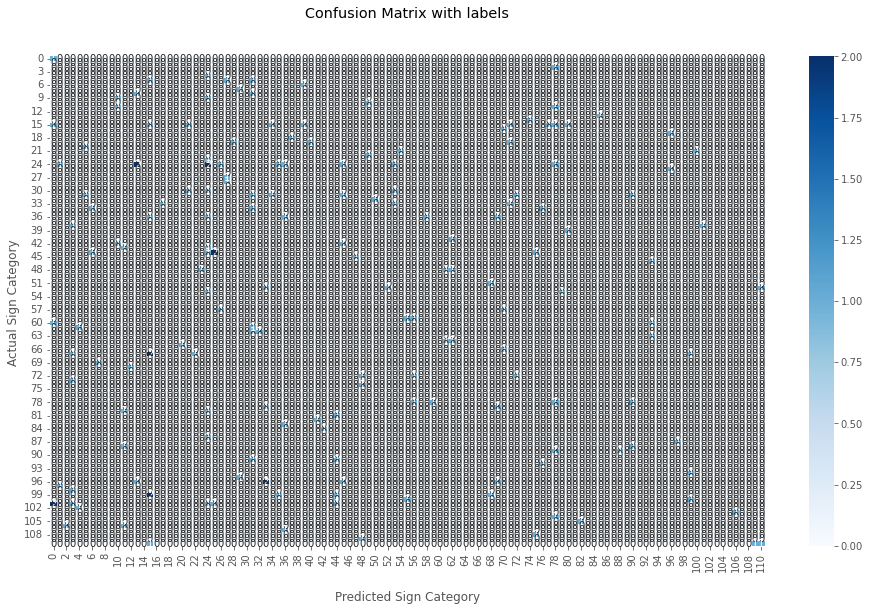

In [246]:
n_neighbors_PC6_10_10inst_alldataset = 2
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.39
Accuracy of K-NN classifier on test set: 0.08


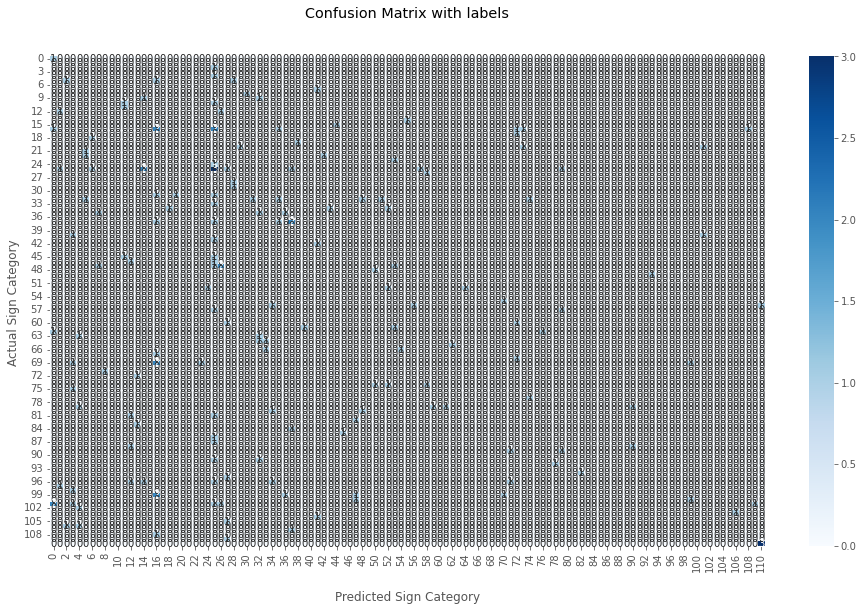

In [247]:
n_neighbors_PC6_10_10inst_alldataset = 3
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.29
Accuracy of K-NN classifier on test set: 0.08


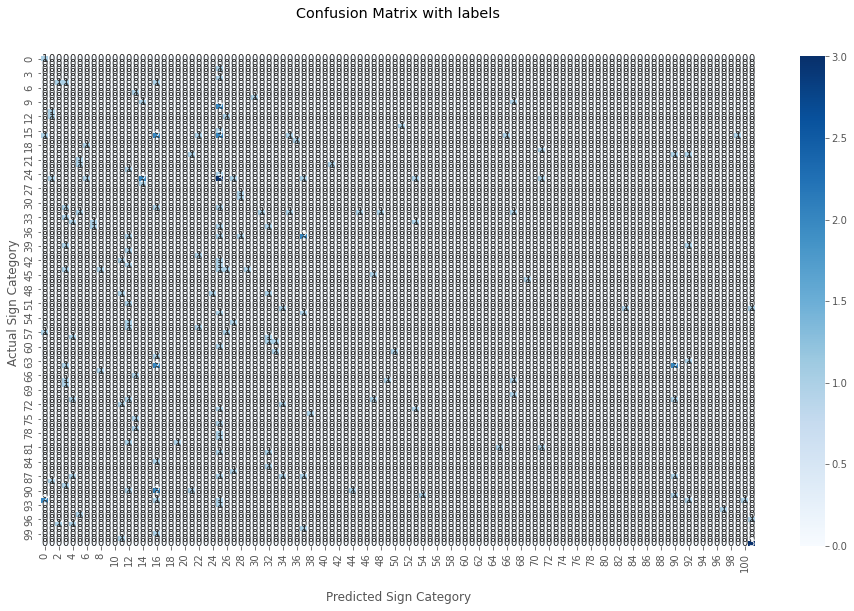

In [248]:
n_neighbors_PC6_10_10inst_alldataset = 5
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [249]:
PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)

dic = {}
for i in range(60):
    x = list(PCA_6components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
		
dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_15648\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_15648\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_15648\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_a

{'feature_199': 1,
 'feature_245': 1,
 'feature_153': 1,
 'feature_291': 1,
 'feature_299': 1,
 'feature_345': 1,
 'feature_107': 1,
 'feature_253': 1,
 'feature_337': 1,
 'feature_207': 1,
 'feature_196': 1,
 'feature_242': 1,
 'feature_194': 1,
 'feature_240': 1,
 'feature_288': 1,
 'feature_150': 1,
 'feature_192': 1,
 'feature_148': 1,
 'feature_238': 1,
 'feature_286': 1,
 'feature_220': 1,
 'feature_228': 1,
 'feature_266': 1,
 'feature_224': 1,
 'feature_274': 1,
 'feature_216': 1,
 'feature_270': 1,
 'feature_174': 1,
 'feature_262': 1,
 'feature_182': 1,
 'feature_260': 1,
 'feature_214': 1,
 'feature_264': 1,
 'feature_218': 1,
 'feature_306': 1,
 'feature_310': 1,
 'feature_168': 1,
 'feature_272': 1,
 'feature_226': 1,
 'feature_172': 1,
 'feature_217': 1,
 'feature_263': 1,
 'feature_171': 1,
 'feature_229': 1,
 'feature_309': 1,
 'feature_221': 1,
 'feature_225': 1,
 'feature_275': 1,
 'feature_183': 1,
 'feature_175': 1,
 'feature_177': 1,
 'feature_173': 1,
 'feature_22